# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/projects/wgong/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [2]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [3]:
model_name = "qwen2.5"  # 'deepseek-coder-v2'  # qwen2.5-coder:1.5b
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
    'options': {
        'gpu': True,
    }
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [5]:
vn = MyVanna(config=CONFIG)

In [6]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [7]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [8]:
vn.run_sql_is_set

True

In [9]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [13]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


## Ask AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warm-up





# QUESTION :  How many customers are there



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) FROM customers;


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM customers;


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

value = df.iloc[0][' COUNT(*)']

if value is not None:
    fig = px.indicator(value=value, title='Number of Customers')
    fig.update_traces(title_text="Number of Customers", value=value, align="right")
    
else:
    print("No data to display")

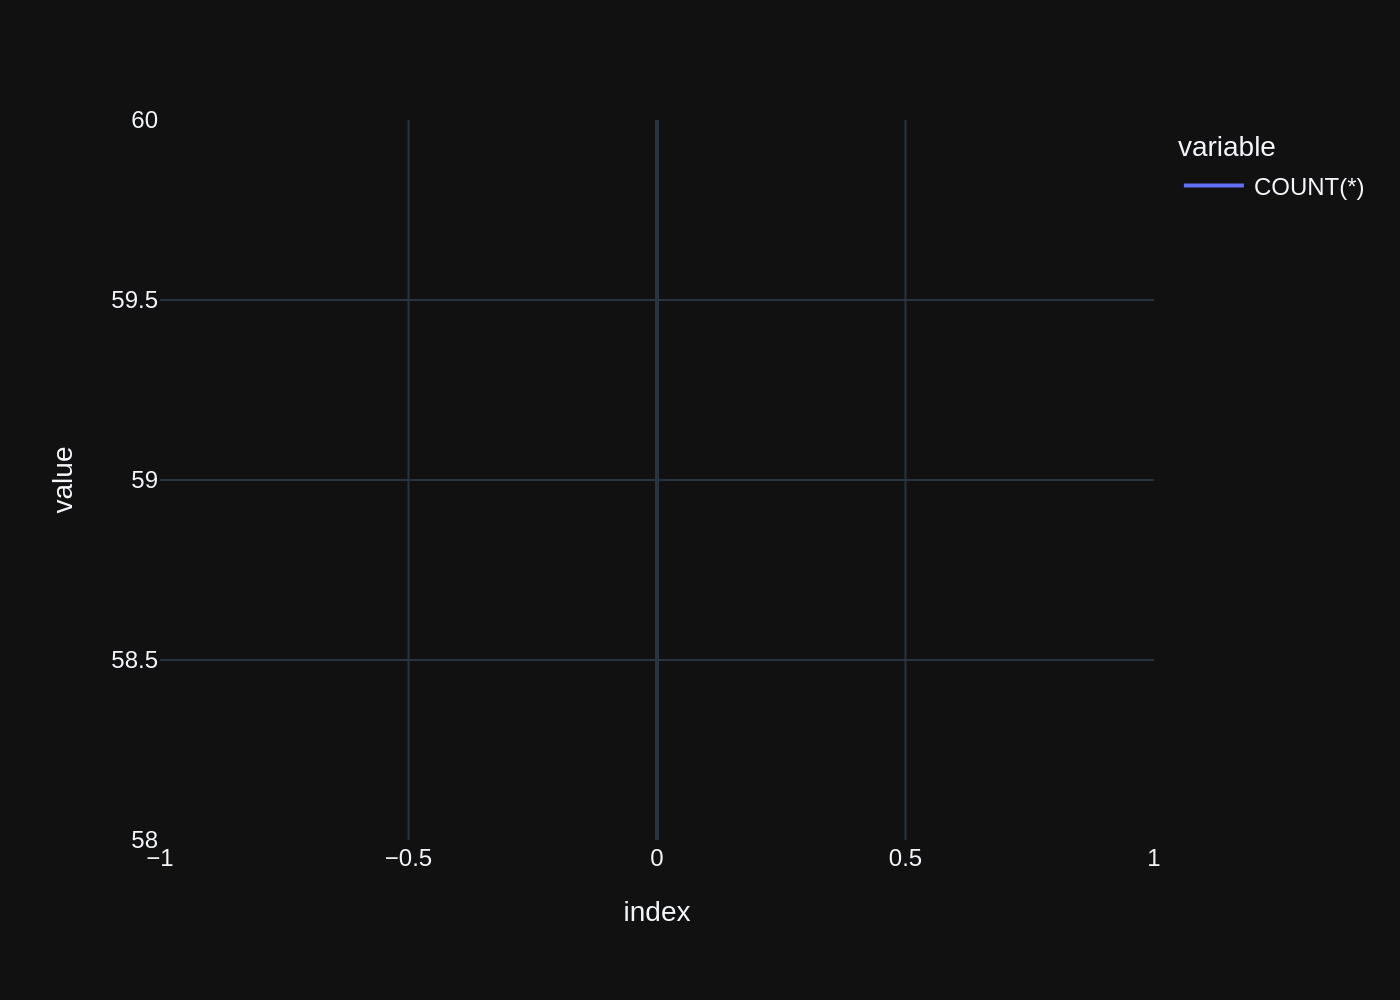

elapsed_time = 5.775628328323364


In [14]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Loop over questions

In [15]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,artists
2,customers
3,employees
4,genres
5,invoice_items
6,invoices
7,media_types
8,playlist_track
9,playlists



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df.iloc[0]['name'], title='Database Table')
else:
    fig = px.bar(df, x=df.index, y='name', title='Database Tables')

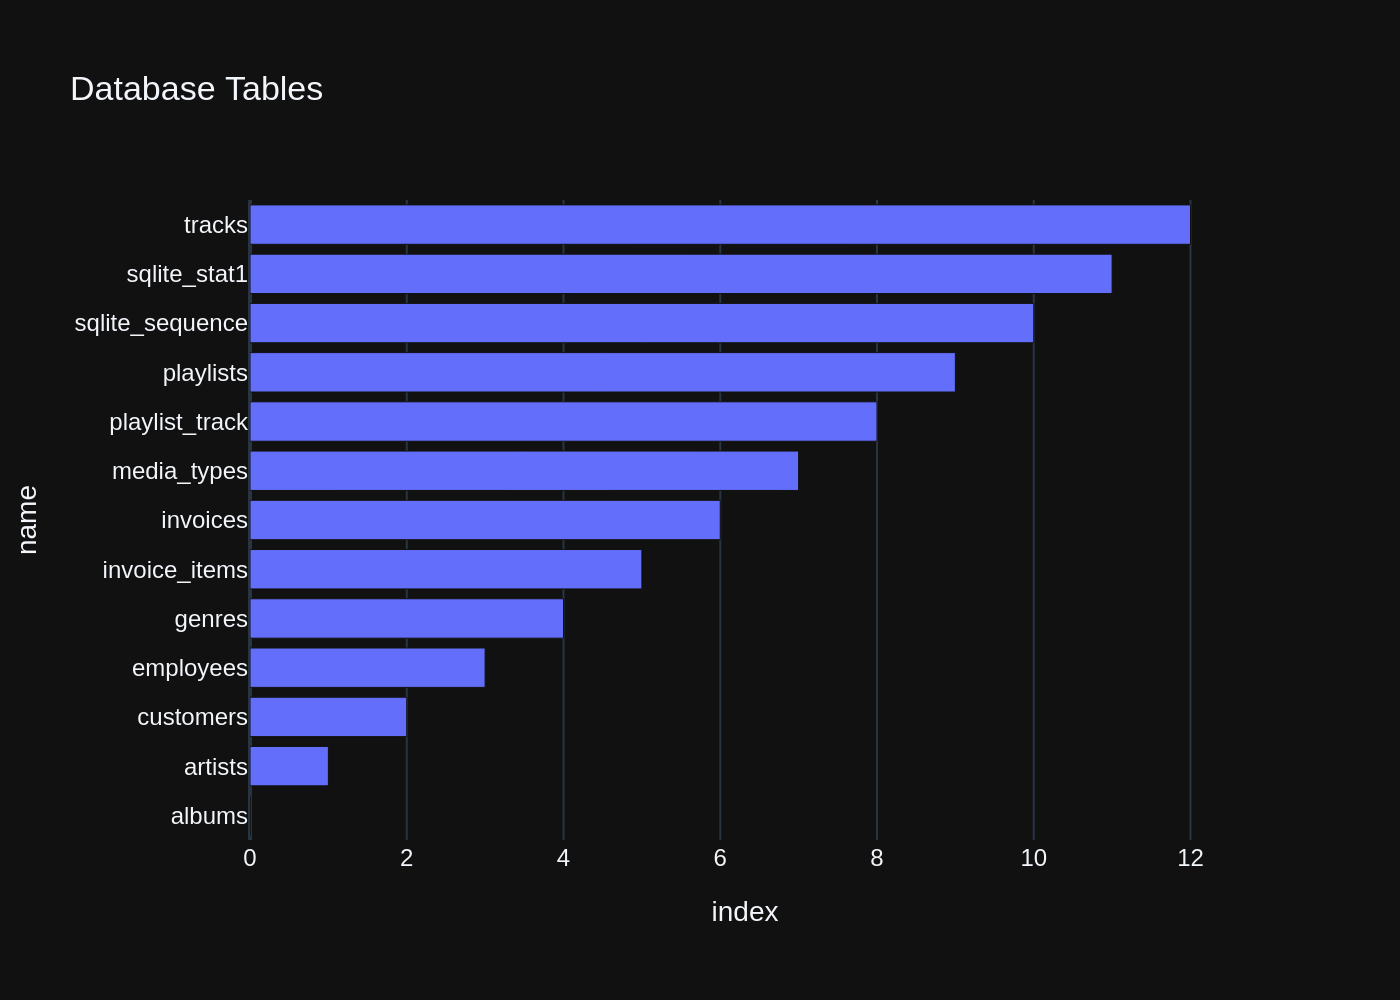





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table' AND name='invoices' LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' AND name='invoices' LIMIT 1;


[( <DataFrame> )]
queried dataframe



,name
0,invoices



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.indicator(value=df['name'].iloc[0], title='Customer Orders Table')

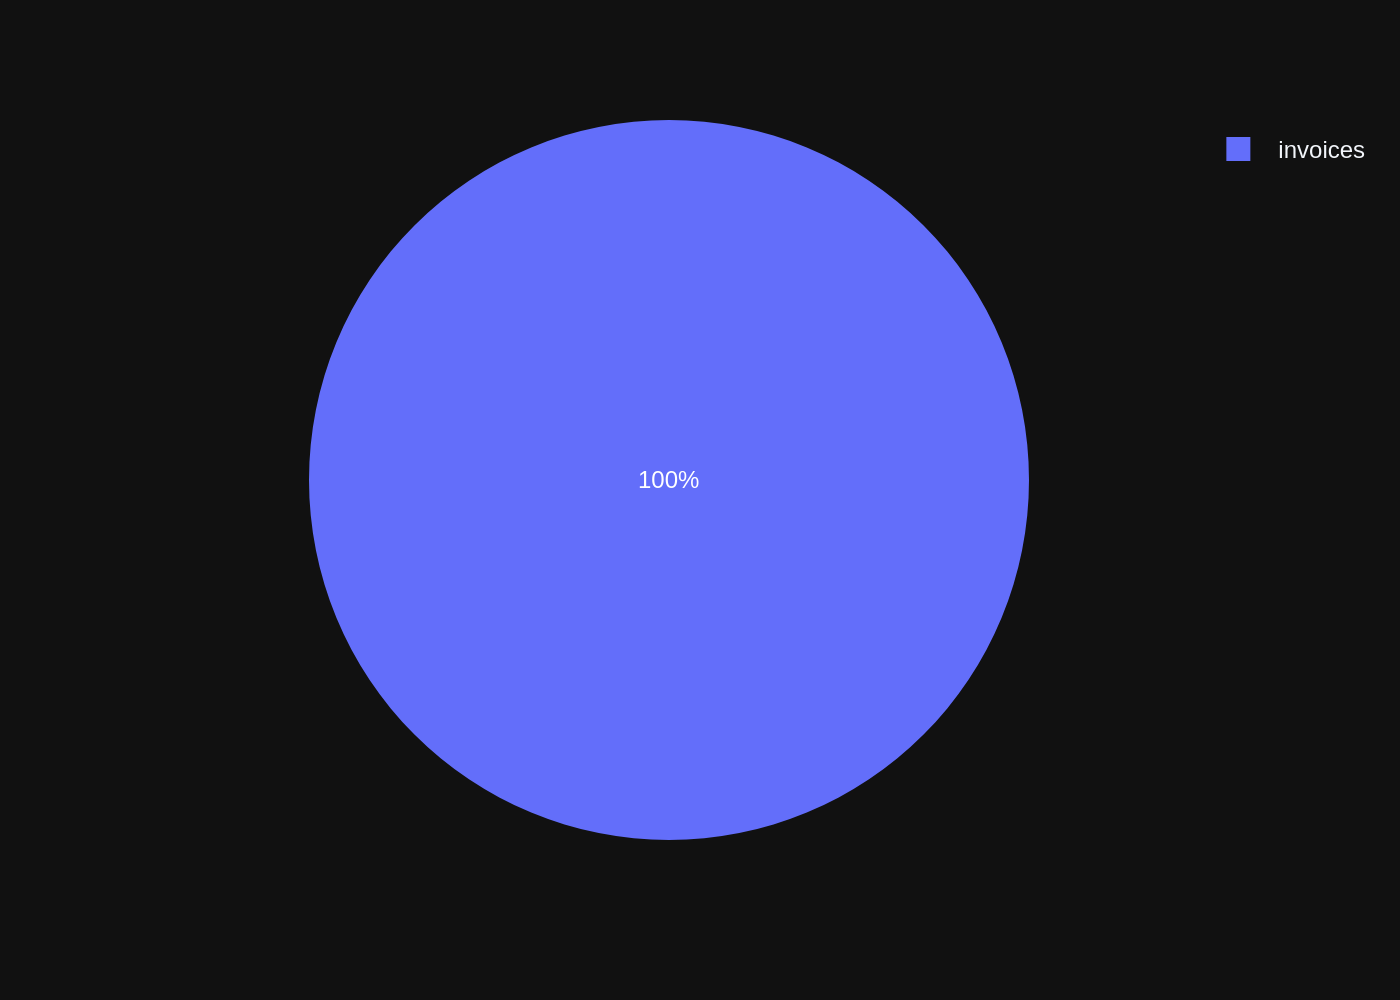





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM customers LIMIT 20


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

indicator = px.indicator(
    value=df[' COUNT(*)'].values[0],
    title={'text': 'Number of Customers: <br><span style="font-size: 20px;">{value}</span>'}
)
indicator.update_traces(title_font_size=40)
indicator.show()

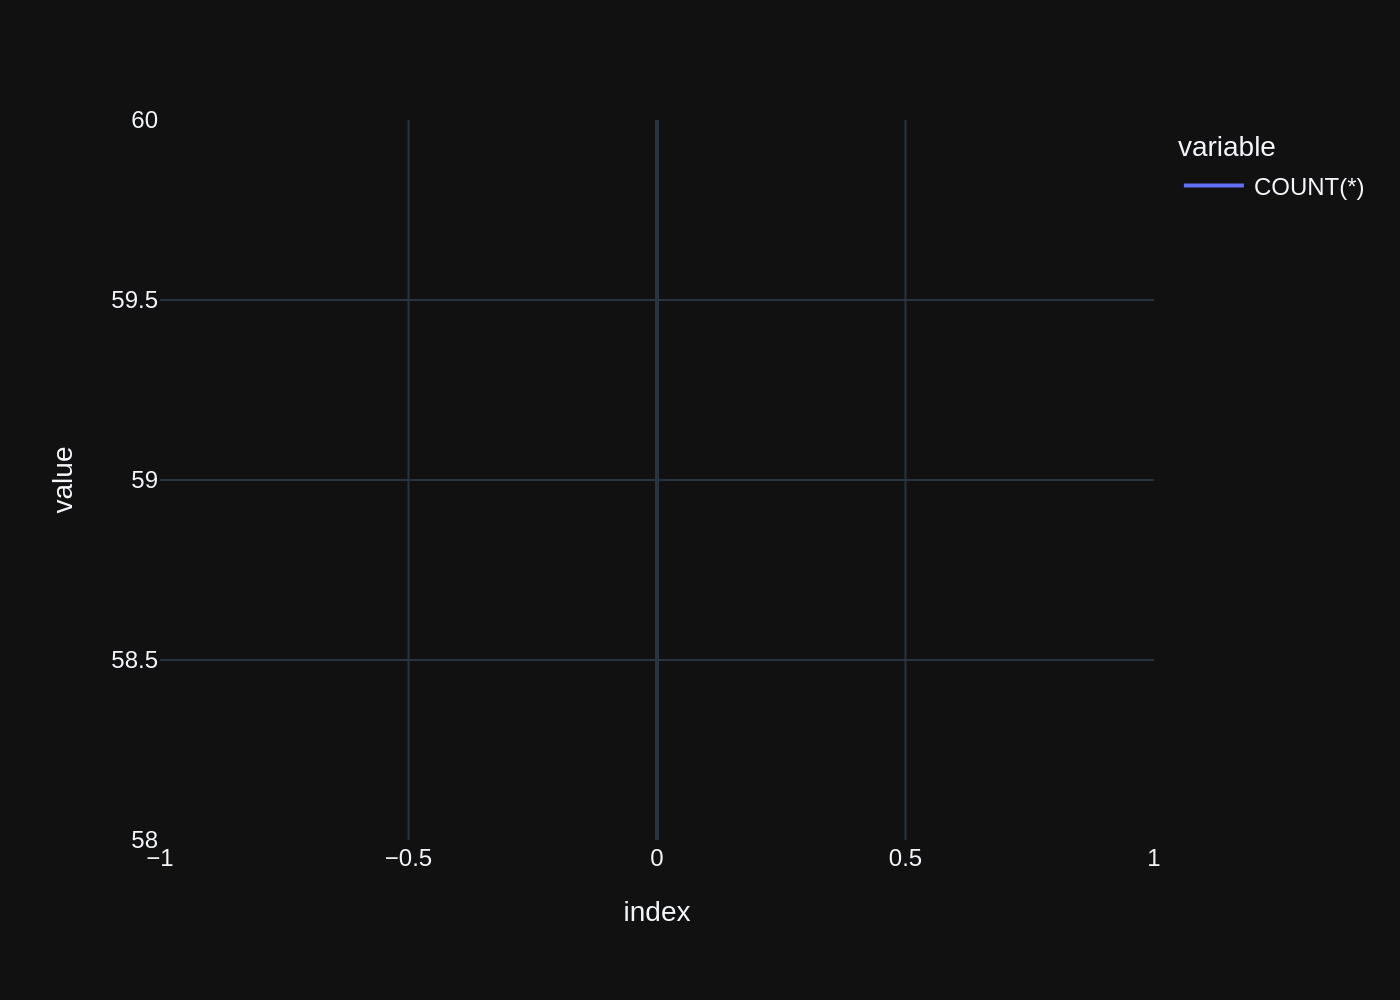





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Country, COUNT(*) AS CustomerCount FROM customers GROUP BY Country ORDER BY CustomerCount DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,Country,CustomerCount
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x=df.columns[0], y='CustomerCount', text=[f'{count}' for count in df['CustomerCount']])
if len(df) == 1:
    fig = px.indicator(value=df.iloc[0]['CustomerCount'], title=f'Top {df.iloc[0][0]} Customers')

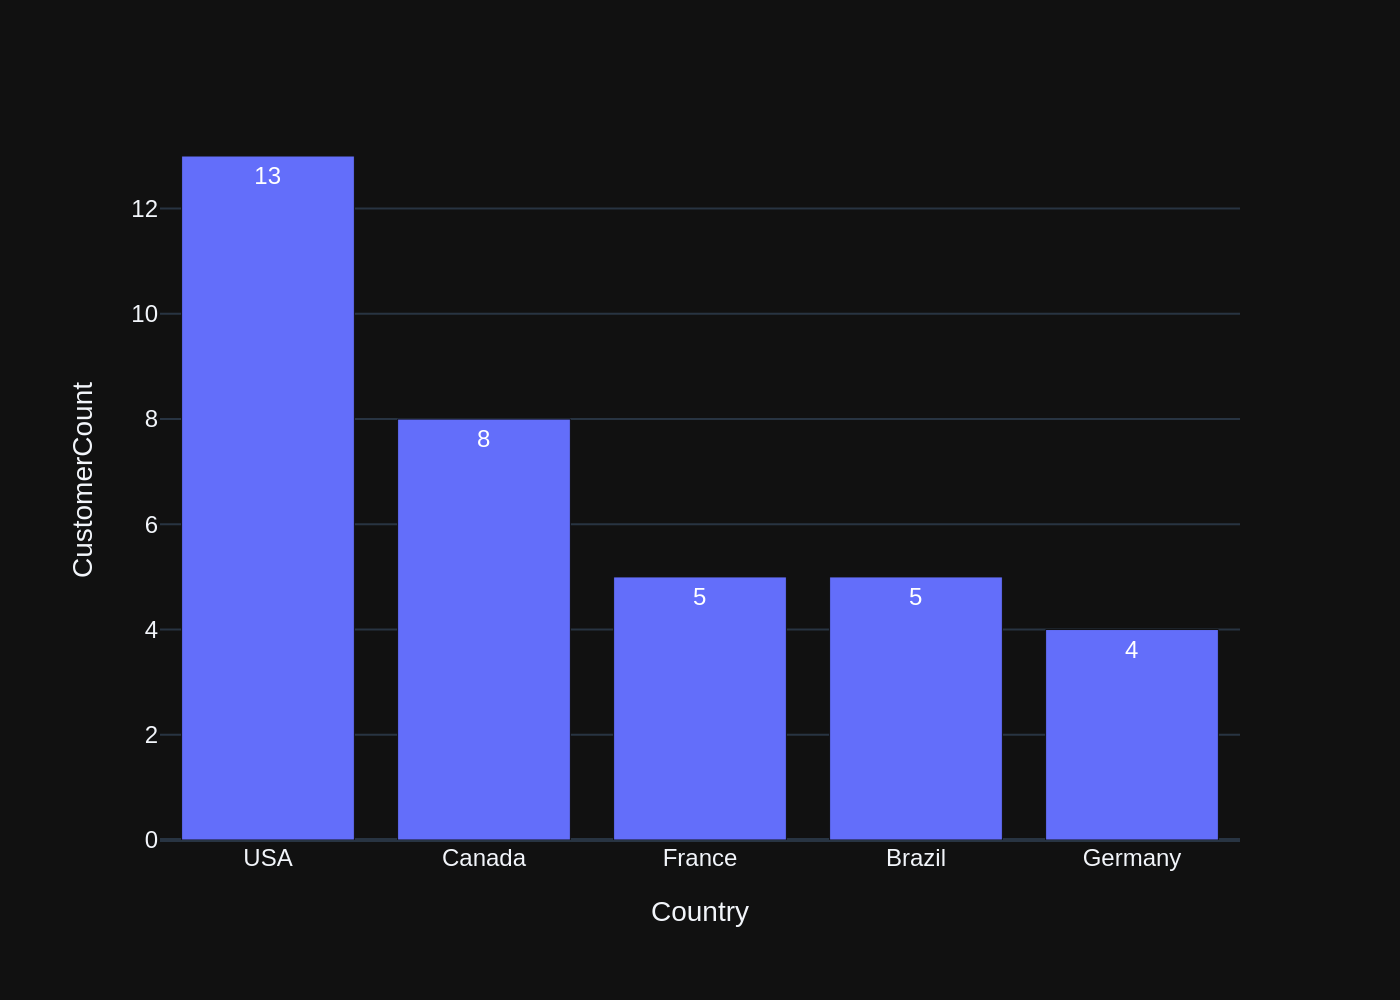





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Title, ar.Name AS ArtistName FROM albums a JOIN artists ar ON a.ArtistId = ar.ArtistId LIMIT 20


[( <DataFrame> )]
queried dataframe



,Title,ArtistName
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
5,Jagged Little Pill,Alanis Morissette
6,Facelift,Alice In Chains
7,Warner 25 Anos,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,Apocalyptica
9,Audioslave,Audioslave



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['Title'][0],
        title=f"Album: {df['Title'][0]}<br>Artist: {df['ArtistName'][0]}"
    )
else:
    fig = px.scatter(
        x=df['ArtistName'], 
        y=df['Title'], 
        text=df['Title']
    )
    fig.update_traces(textposition='top center')

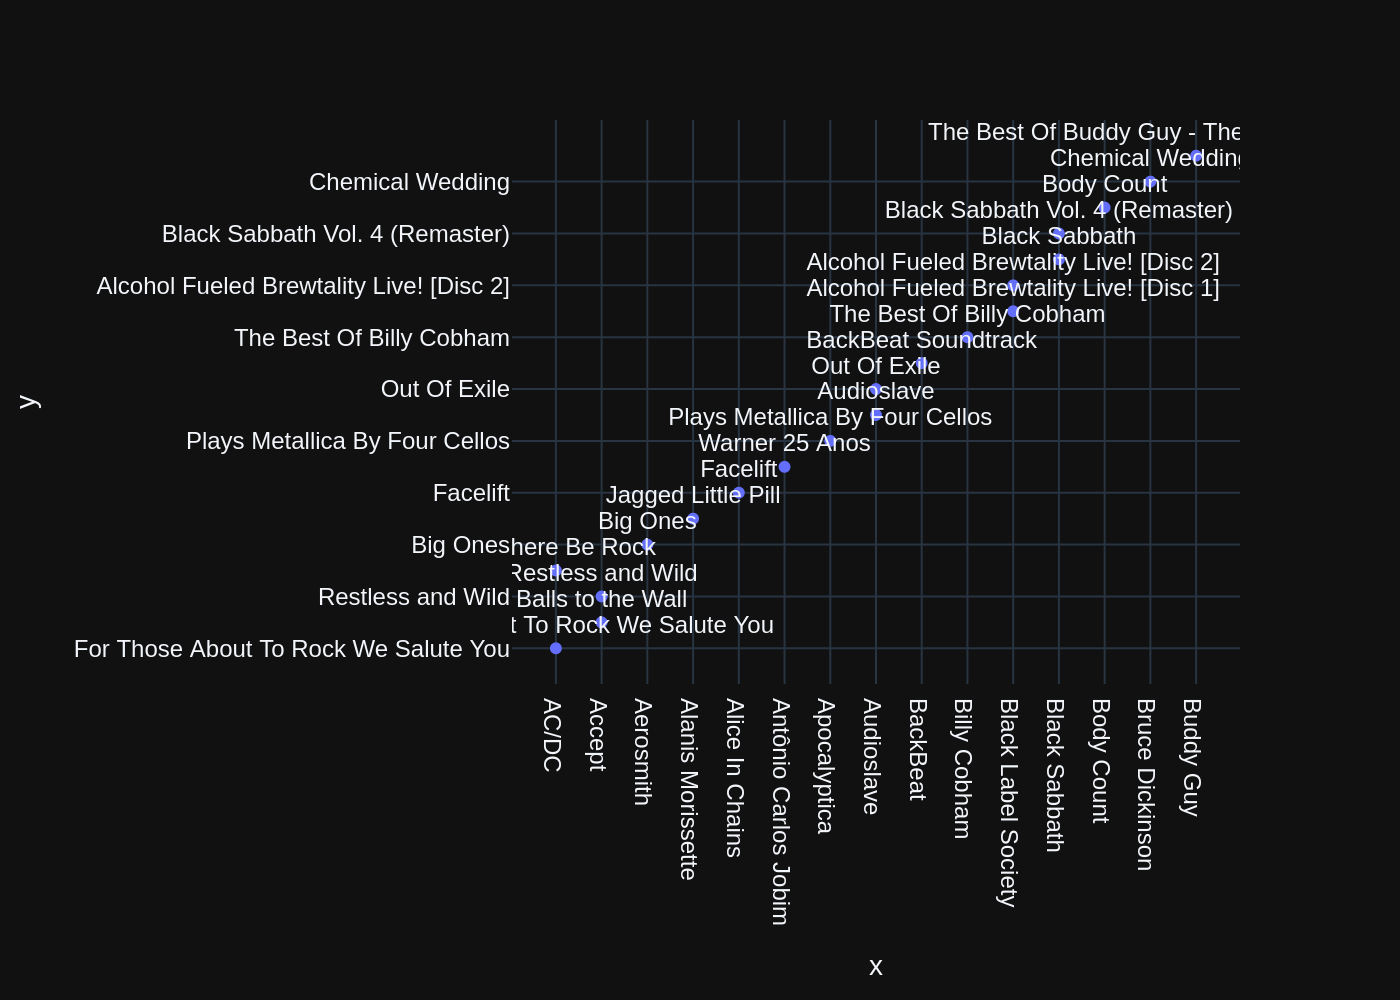





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name FROM tracks WHERE LOWER(Name) LIKE '%what%' LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name
0,What It Takes
1,What You Are
2,Do what cha wanna
3,What is and Should Never Be
4,So What
5,What A Day
6,What If I Do?
7,What Now My Love
8,Whatsername
9,"Whatever It Is, I Just Can't Stop"



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(values=df['Name'].iloc[0])
else:
    fig = px.histogram(x=df['Name'])

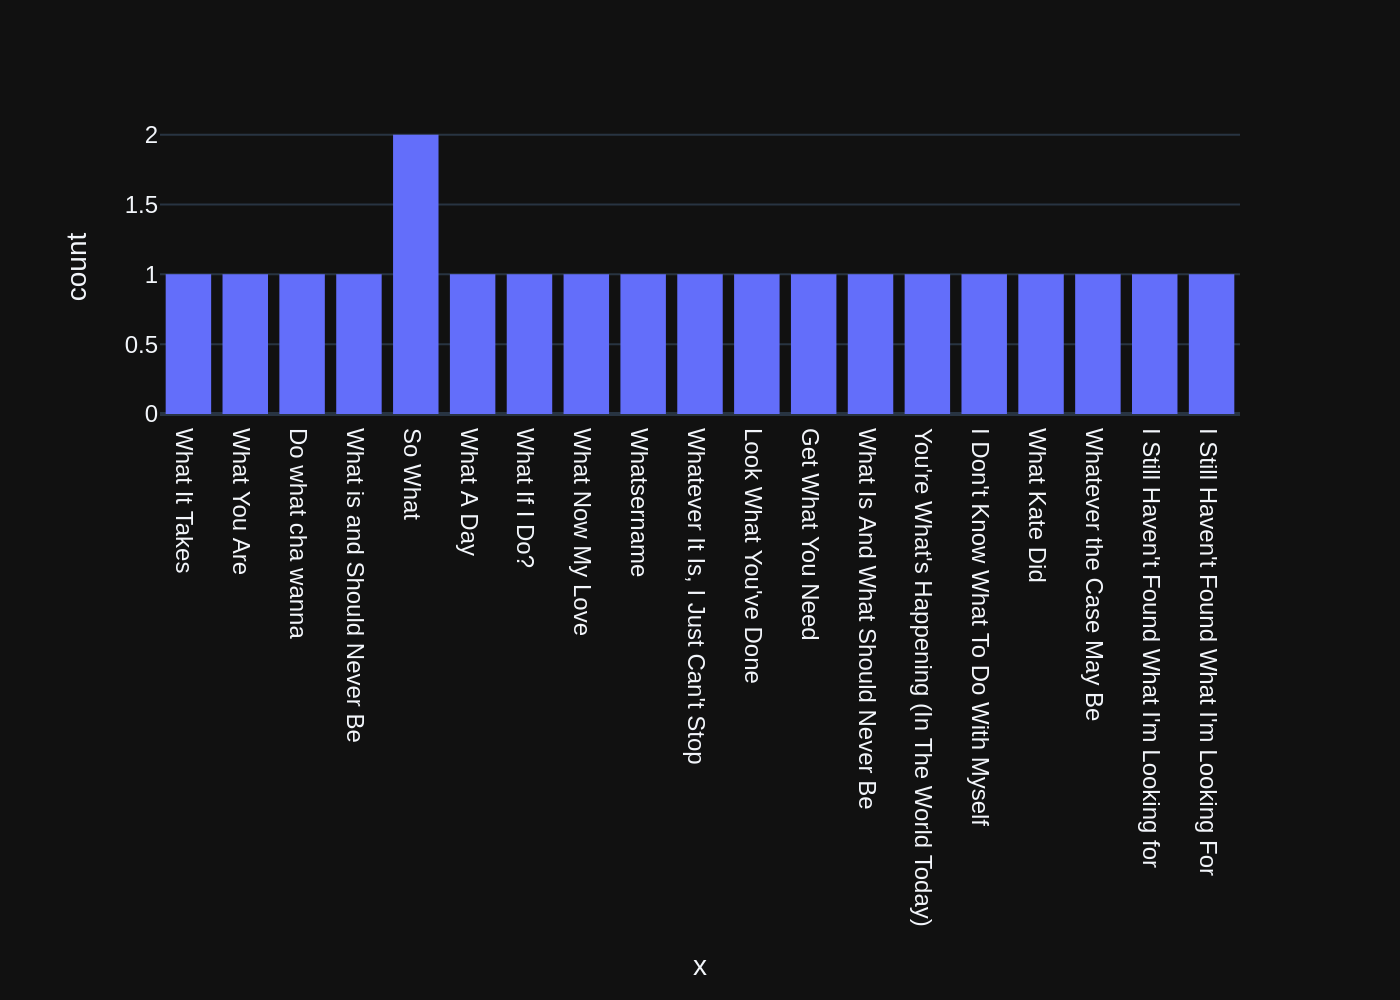





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,InvoiceCount
0,1,Luís,Gonçalves,7
1,2,Leonie,Köhler,7
2,3,François,Tremblay,7
3,4,Bjørn,Hansen,7
4,5,František,Wichterlová,7
5,6,Helena,Holý,7
6,7,Astrid,Gruber,7
7,8,Daan,Peeters,7
8,9,Kara,Nielsen,7
9,10,Eduardo,Martins,7



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['InvoiceCount'].values[0],
        title=f"Total Invoices for Customer {df['FirstName'].values[0]} {df['LastName'].values[0]}"
    )
else:
    fig = px.bar(df, x='FirstName', y='InvoiceCount', text='InvoiceCount')

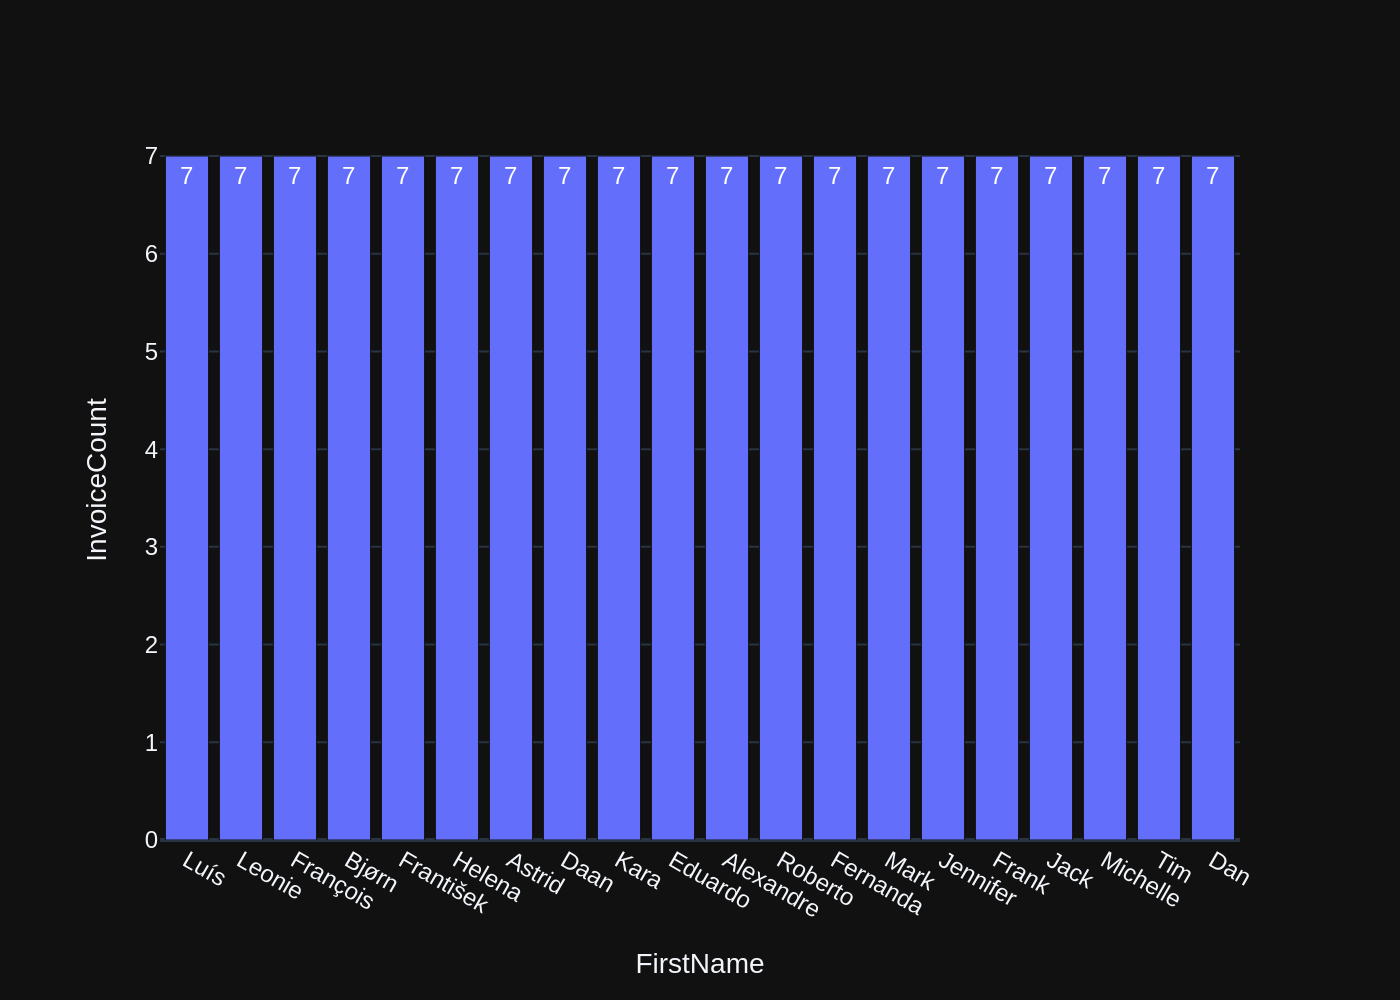





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.Country, COUNT(i.InvoiceId) AS InvoiceCount FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.Country LIMIT 20


[( <DataFrame> )]
queried dataframe



,Country,InvoiceCount
0,Argentina,7
1,Australia,7
2,Austria,7
3,Belgium,7
4,Brazil,35
5,Canada,56
6,Chile,7
7,Czech Republic,14
8,Denmark,7
9,Finland,7



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df.InvoiceCount.iloc[0], title='Total Invoices per Country')
else:
    fig = px.bar(df, x='Country', y='InvoiceCount', title='Total Invoices per Country')

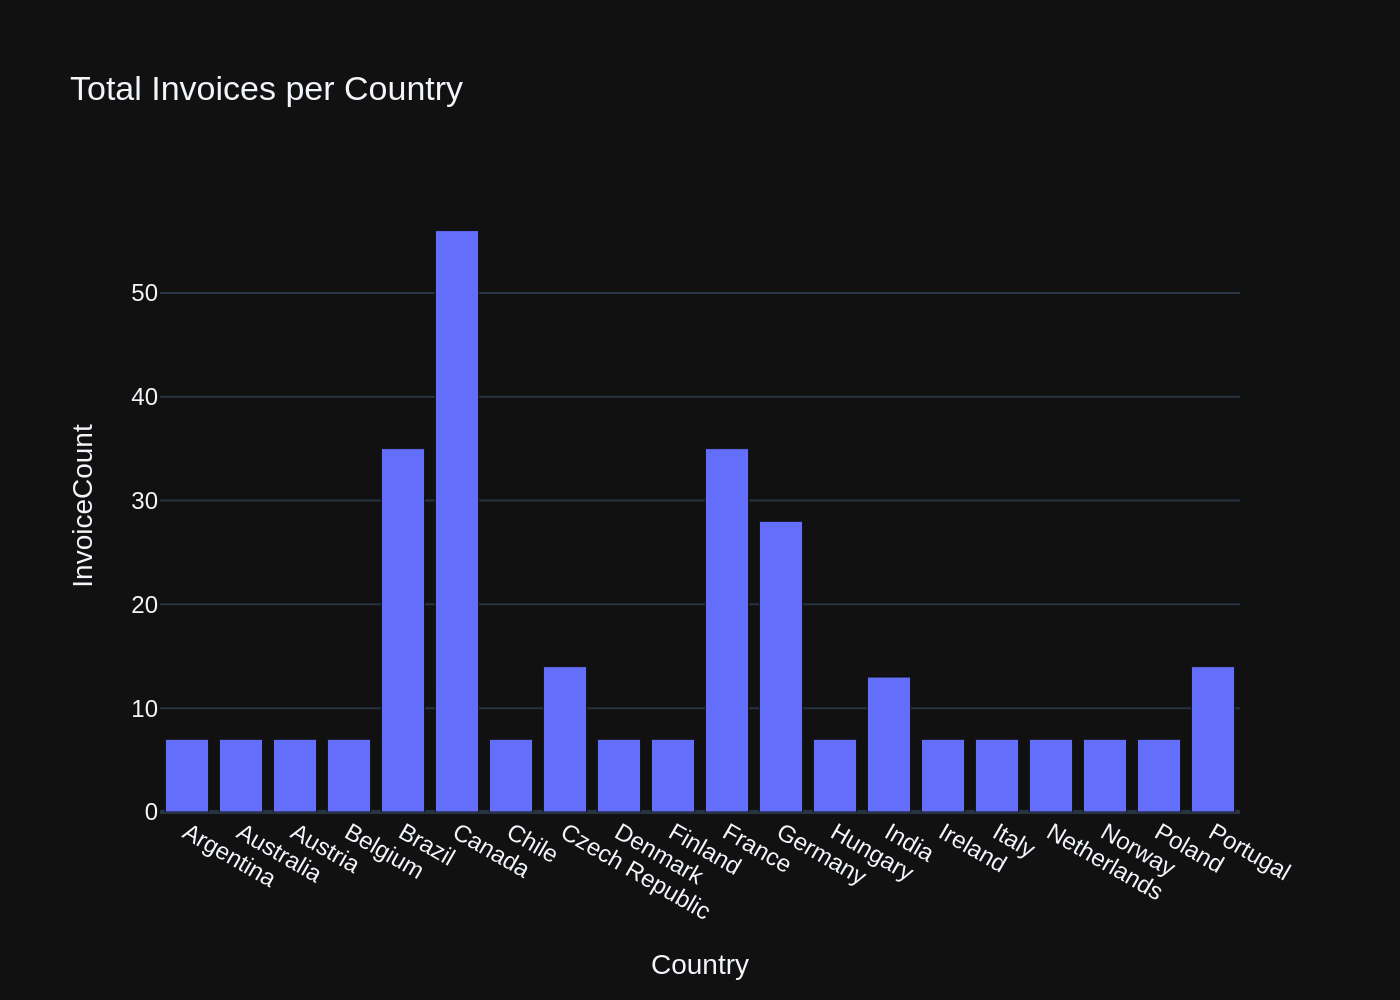





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceId, Total, CustomerId, InvoiceDate FROM invoices WHERE Total > 10 LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,Total,CustomerId,InvoiceDate
0,5,13.86,23,2009-01-11 00:00:00
1,12,13.86,2,2009-02-11 00:00:00
2,19,13.86,40,2009-03-14 00:00:00
3,26,13.86,19,2009-04-14 00:00:00
4,33,13.86,57,2009-05-15 00:00:00
5,40,13.86,36,2009-06-15 00:00:00
6,47,13.86,15,2009-07-16 00:00:00
7,54,13.86,53,2009-08-16 00:00:00
8,61,13.86,32,2009-09-16 00:00:00
9,68,13.86,11,2009-10-17 00:00:00



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['Total'].values[0],
        title=f"Invoice ID: {df['InvoiceId'].values[0]}",
        color_scale=["greenyellow", "red"]
    )
else:
    fig = px.bar(df, x='InvoiceId', y='Total', title="Invoices with Total Exceeding $10")

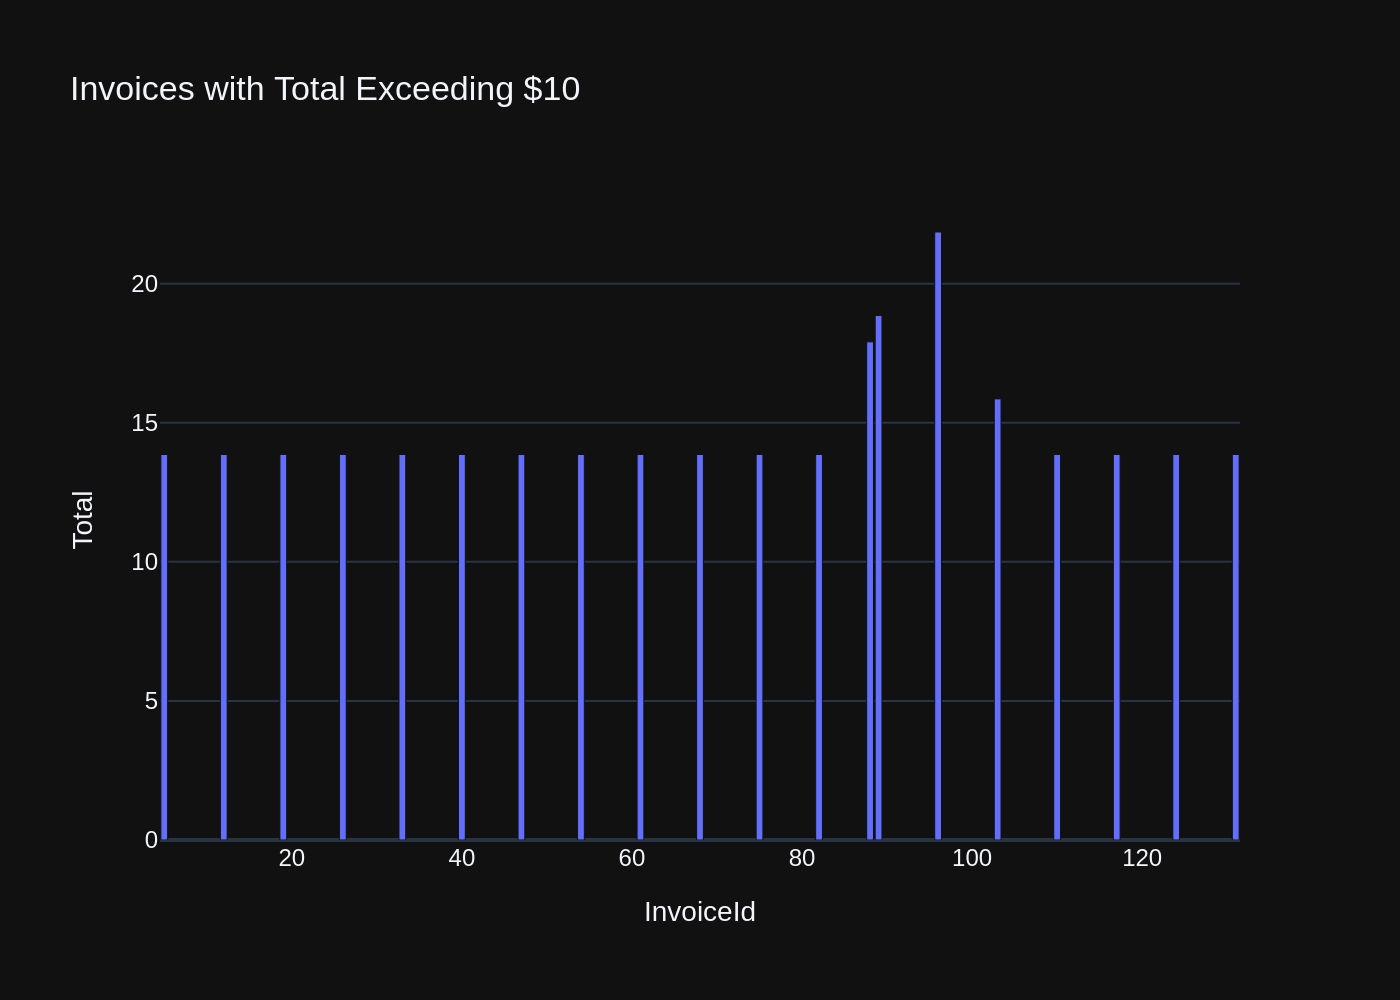





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceId, InvoiceDate, Total FROM invoices WHERE InvoiceDate >= '2010-01-01' LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,InvoiceDate,Total
0,84,2010-01-08 00:00:00,1.98
1,85,2010-01-08 00:00:00,1.98
2,86,2010-01-09 00:00:00,3.96
3,87,2010-01-10 00:00:00,6.94
4,88,2010-01-13 00:00:00,17.91
5,89,2010-01-18 00:00:00,18.86
6,90,2010-01-26 00:00:00,0.99
7,91,2010-02-08 00:00:00,1.98
8,92,2010-02-08 00:00:00,1.98
9,93,2010-02-09 00:00:00,3.96



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['Total'].values[0],
        title=f"Total Invoiced Since 2010: ${df['Total'].values[0]:,.2f}"
    )
else:
    fig = px.line(df, x='InvoiceDate', y='Total', title='Invoices Since 2010')

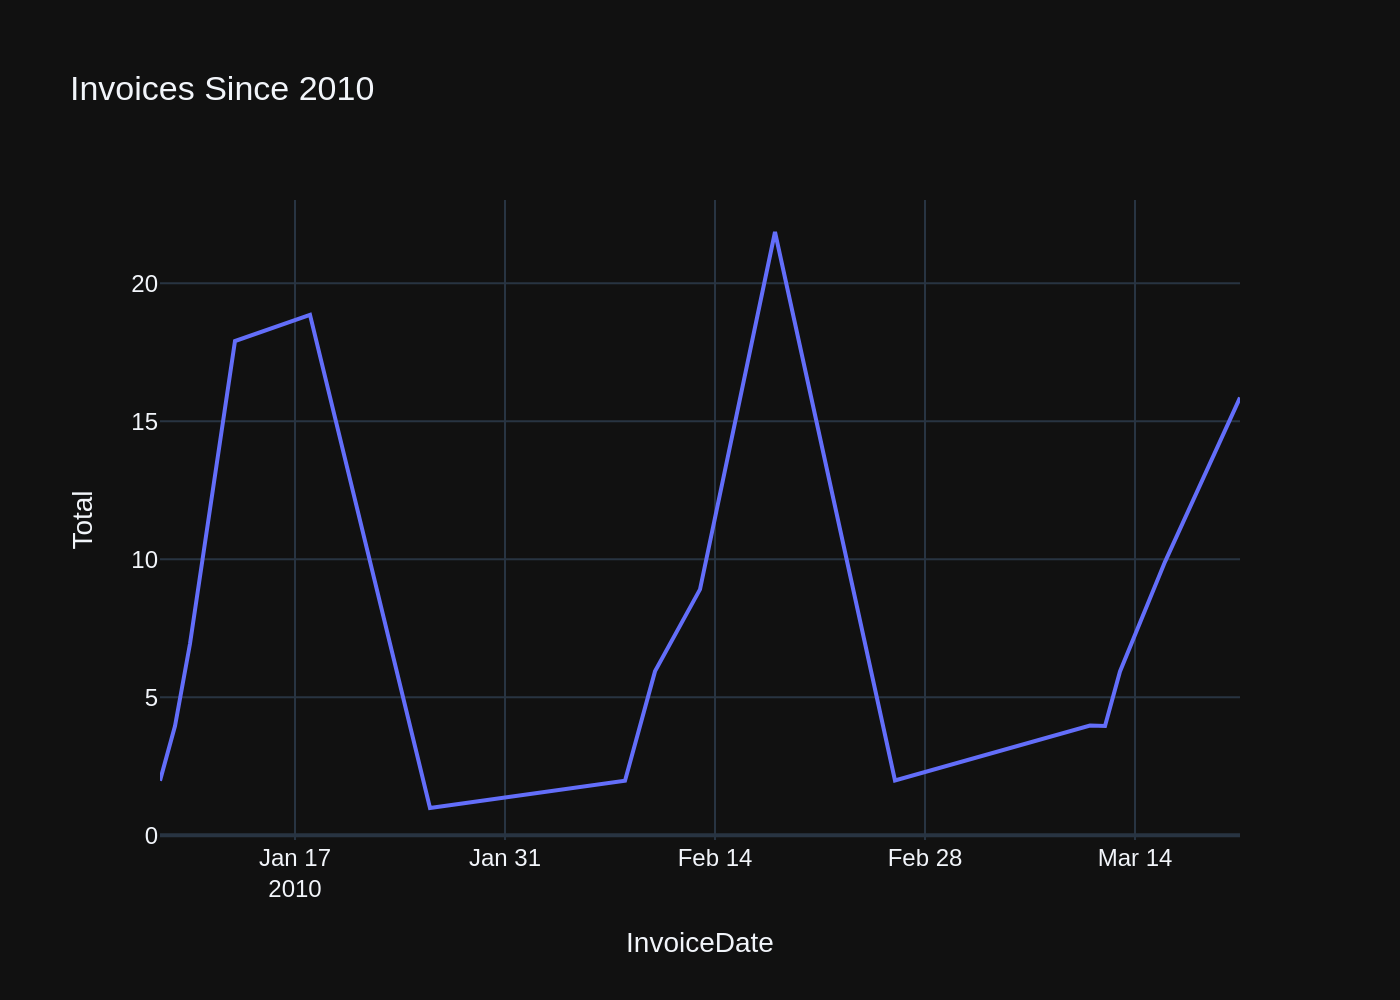





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT e1.FirstName, e1.LastName, COALESCE(e2.FirstName, 'No Manager') || ' ' || COALESCE(e2.LastName, '') AS ManagerName FROM employees e1 LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,ManagerName
0,Andrew,Adams,No Manager
1,Nancy,Edwards,Andrew Adams
2,Jane,Peacock,Nancy Edwards
3,Margaret,Park,Nancy Edwards
4,Steve,Johnson,Nancy Edwards
5,Michael,Mitchell,Andrew Adams
6,Robert,King,Michael Mitchell
7,Laura,Callahan,Michael Mitchell



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.indicators.Number(
    title="Employee and Manager Chart",
    value=len(df) if len(df) > 1 else df['ManagerName'],
    comparison_value=0 if len(df) == 1 else None,
    title_font_size=45,
    title_x=0.5
)

fig.update_traces(
    indicator_color="steelblue" if len(df) > 1 else "skyblue"
)

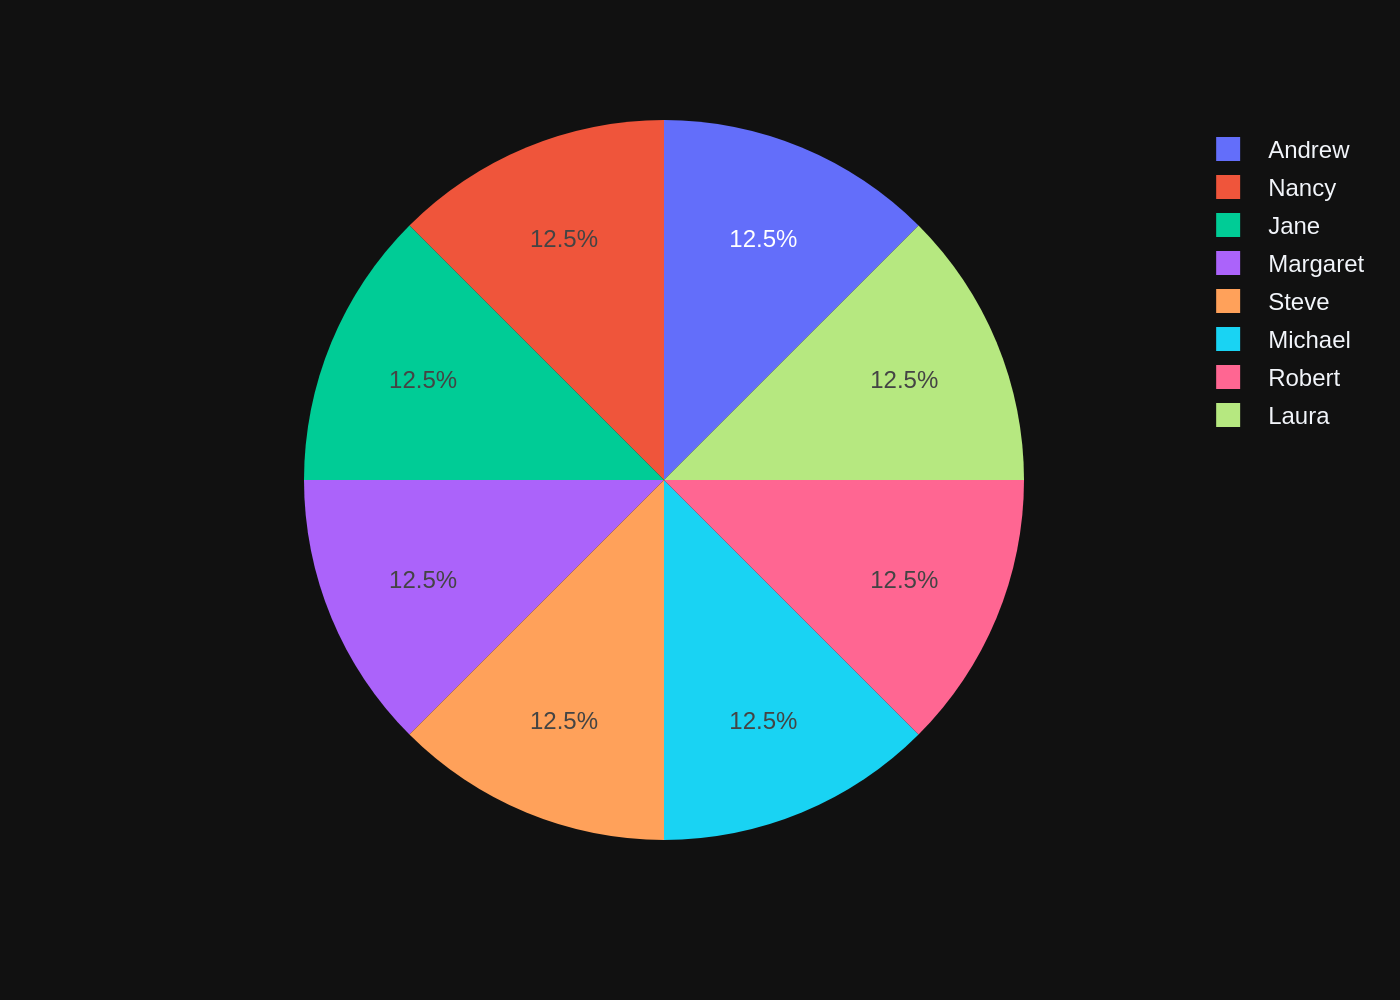





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,AverageInvoiceTotal
0,1,Luís,Gonçalves,5.660000
1,2,Leonie,Köhler,5.374286
2,3,François,Tremblay,5.660000
3,4,Bjørn,Hansen,5.660000
4,5,František,Wichterlová,5.802857
5,6,Helena,Holý,7.088571
6,7,Astrid,Gruber,6.088571
7,8,Daan,Peeters,5.374286
8,9,Kara,Nielsen,5.374286
9,10,Eduardo,Martins,5.374286



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['AverageInvoiceTotal'].values[0],
        title="Average Invoice Total for Customer",
        color_continuous_scale=px.colors.sequential.Blues
    )
else:
    fig = px.bar(
        df, 
        x='FirstName', 
        y='AverageInvoiceTotal', 
        title='Average Invoice Total by Customer',
        labels={'FirstName': 'Customer Name'}
    )

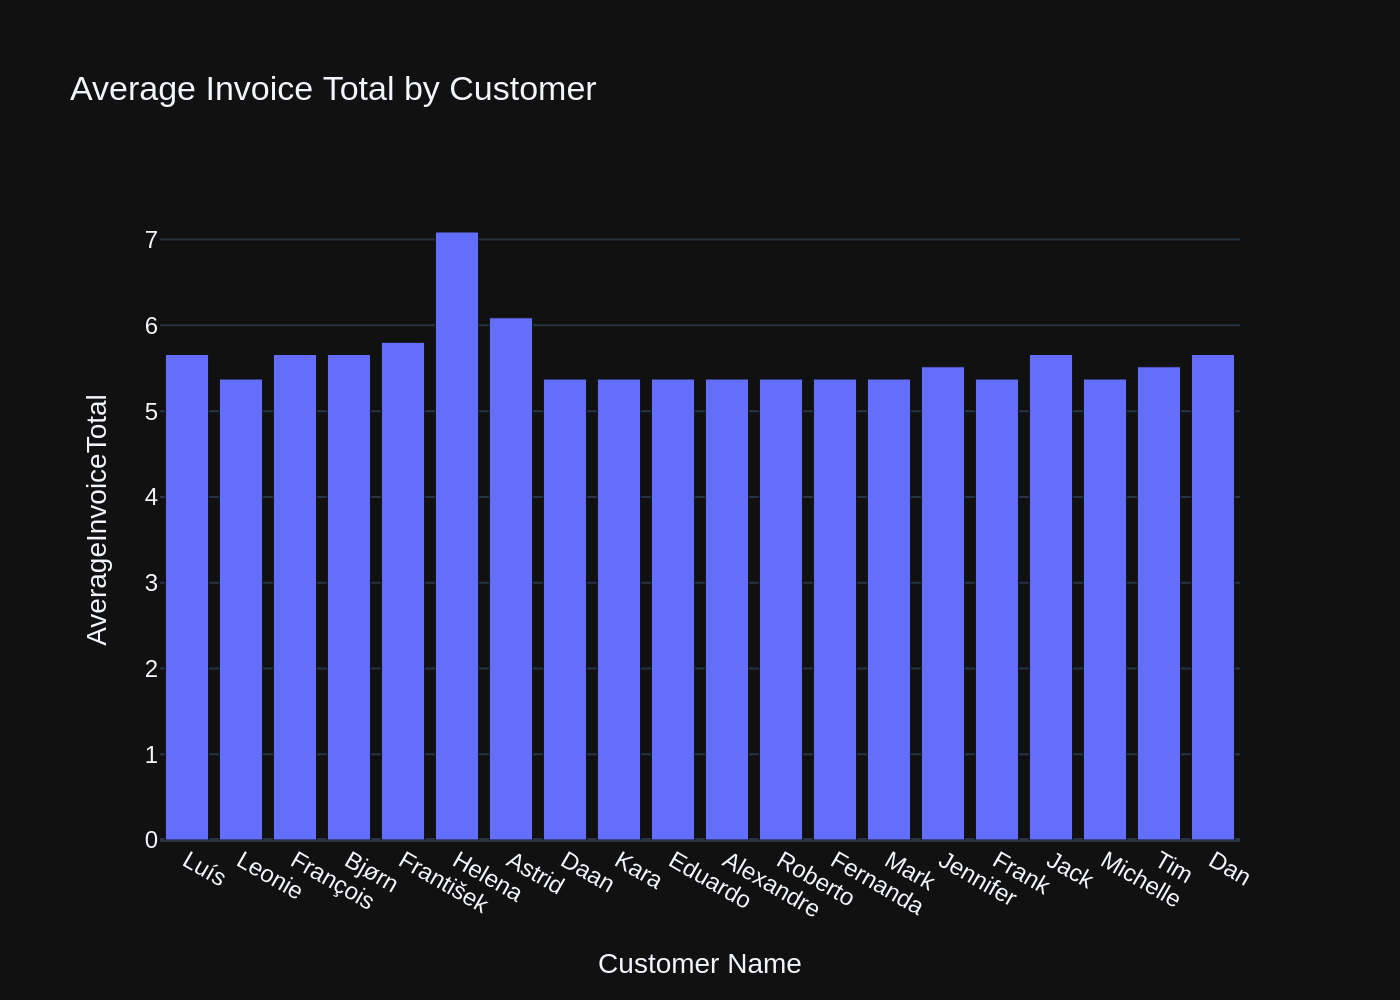





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name, UnitPrice FROM tracks ORDER BY UnitPrice DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,Name,UnitPrice
0,Battlestar Galactica: The Story So Far,1.99
1,Occupation / Precipice,1.99
2,"Exodus, Pt. 1",1.99
3,"Exodus, Pt. 2",1.99
4,Collaborators,1.99



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(values=df['UnitPrice'].iloc[0], 
                       title='Top Most Expensive Track')
else:
    fig = px.bar(df, x='Name', y='UnitPrice', title='Top 5 Most Expensive Tracks')

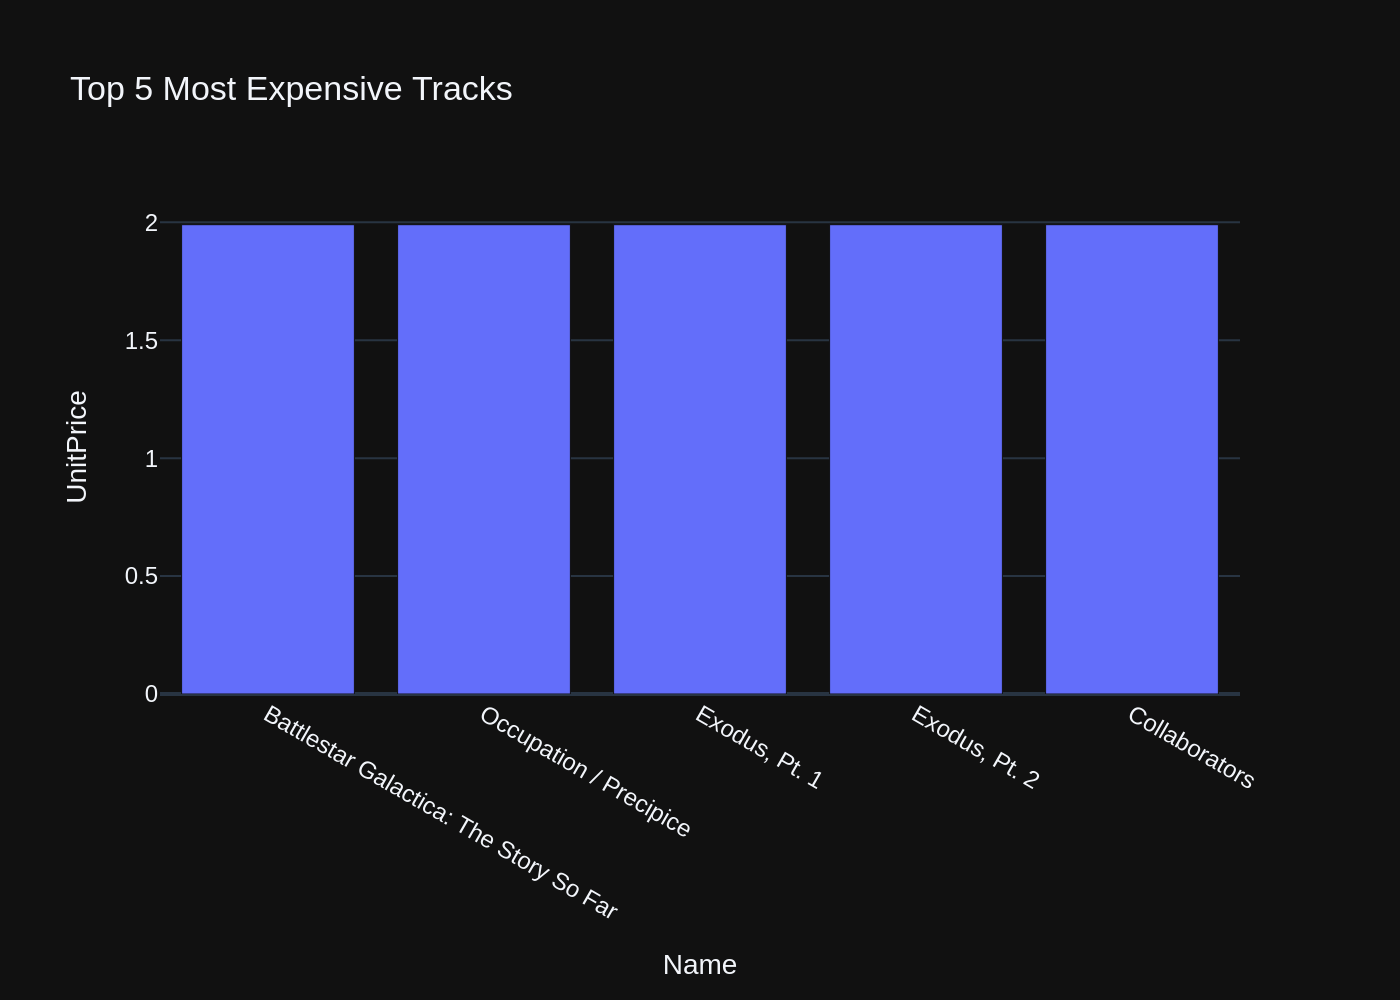





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT g.Name, COUNT(t.TrackId) AS TrackCount FROM genres g LEFT JOIN tracks t ON g.GenreId = t.GenreId GROUP BY g.Name LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name,TrackCount
0,Alternative,40
1,Alternative & Punk,332
2,Blues,81
3,Bossa Nova,15
4,Classical,74
5,Comedy,17
6,Drama,64
7,Easy Listening,24
8,Electronica/Dance,30
9,Heavy Metal,28



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df.iloc[0]['TrackCount'],
        title=f"Number of Tracks in Genre: {df.iloc[0]['Name']}",
        color_scale=['darkblue', 'lightblue']
    )
else:
    fig = px.bar(df, x='Name', y='TrackCount', text='TrackCount')
    fig.update_layout(title="Number of Tracks in Each Genre")

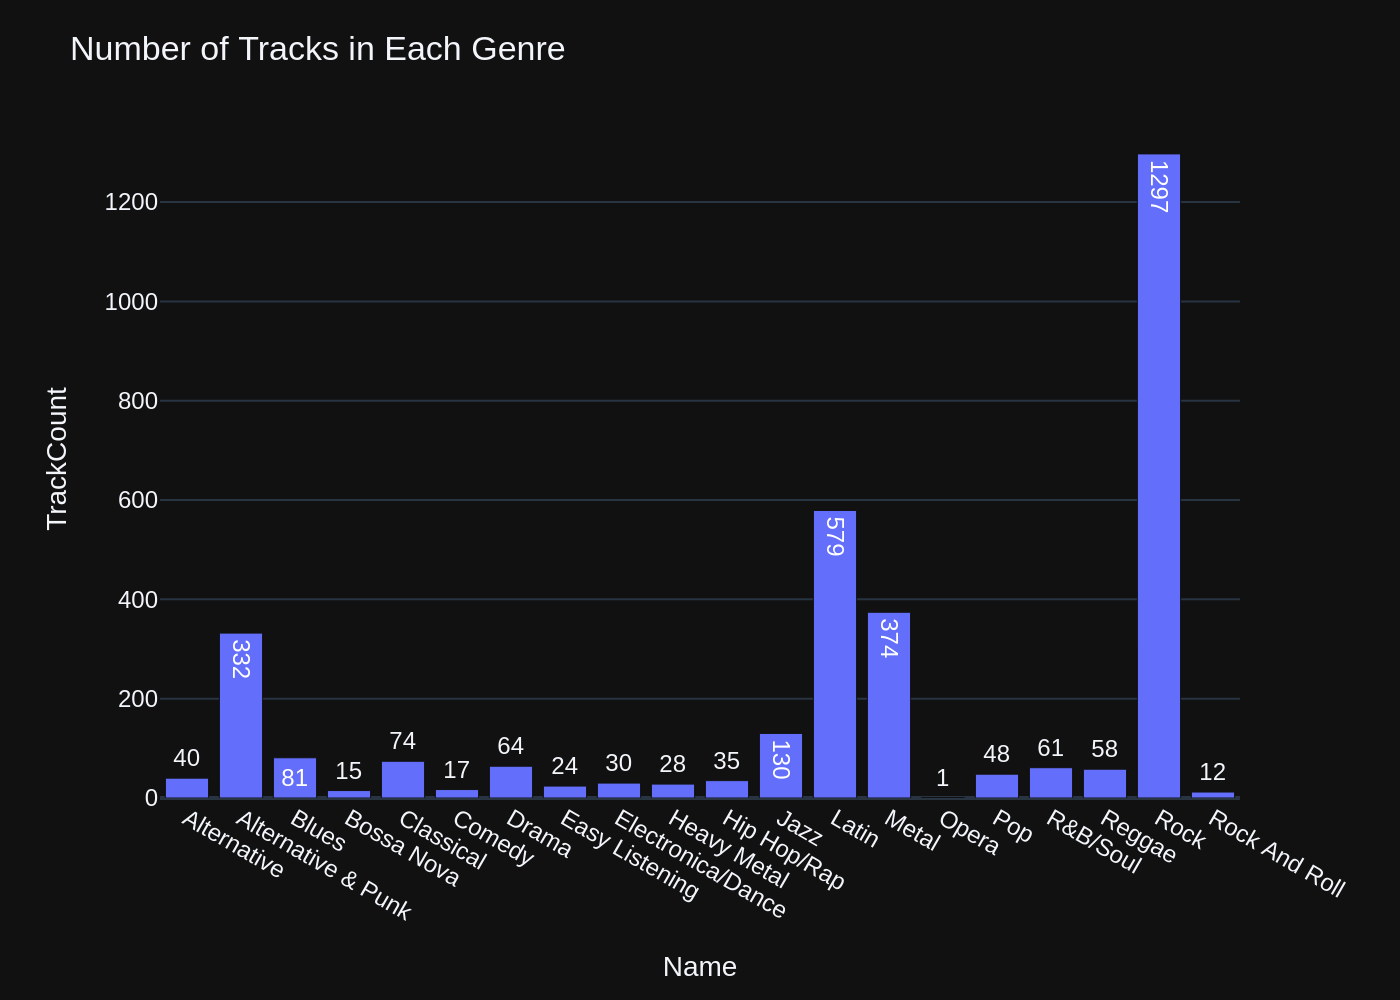





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks) LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks) LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name FROM genres WHERE GenreId NOT IN (SELECT GenreId FROM tracks) LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT g.Name FROM genres g LEFT JOIN tracks t ON g.GenreId = t.GenreId WHERE t.GenreId IS NULL LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name






# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, FirstName, LastName FROM customers WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices) LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName



[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices) LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName



[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices) LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName



[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices) LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName






# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS TrackCount FROM artists a JOIN albums al ON a.ArtistId = al.ArtistId JOIN tracks t ON al.AlbumId = t.AlbumId GROUP BY a.ArtistId, a.Name ORDER BY TrackCount DESC LIMIT 10


[( <DataFrame> )]
queried dataframe



,ArtistName,TrackCount
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Deep Purple,92
5,Lost,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df['TrackCount'].values[0], title='Top Artist by Track Count')
else:
    fig = px.bar(df, x='ArtistName', y='TrackCount', title='Top 10 Artists by Track Count')

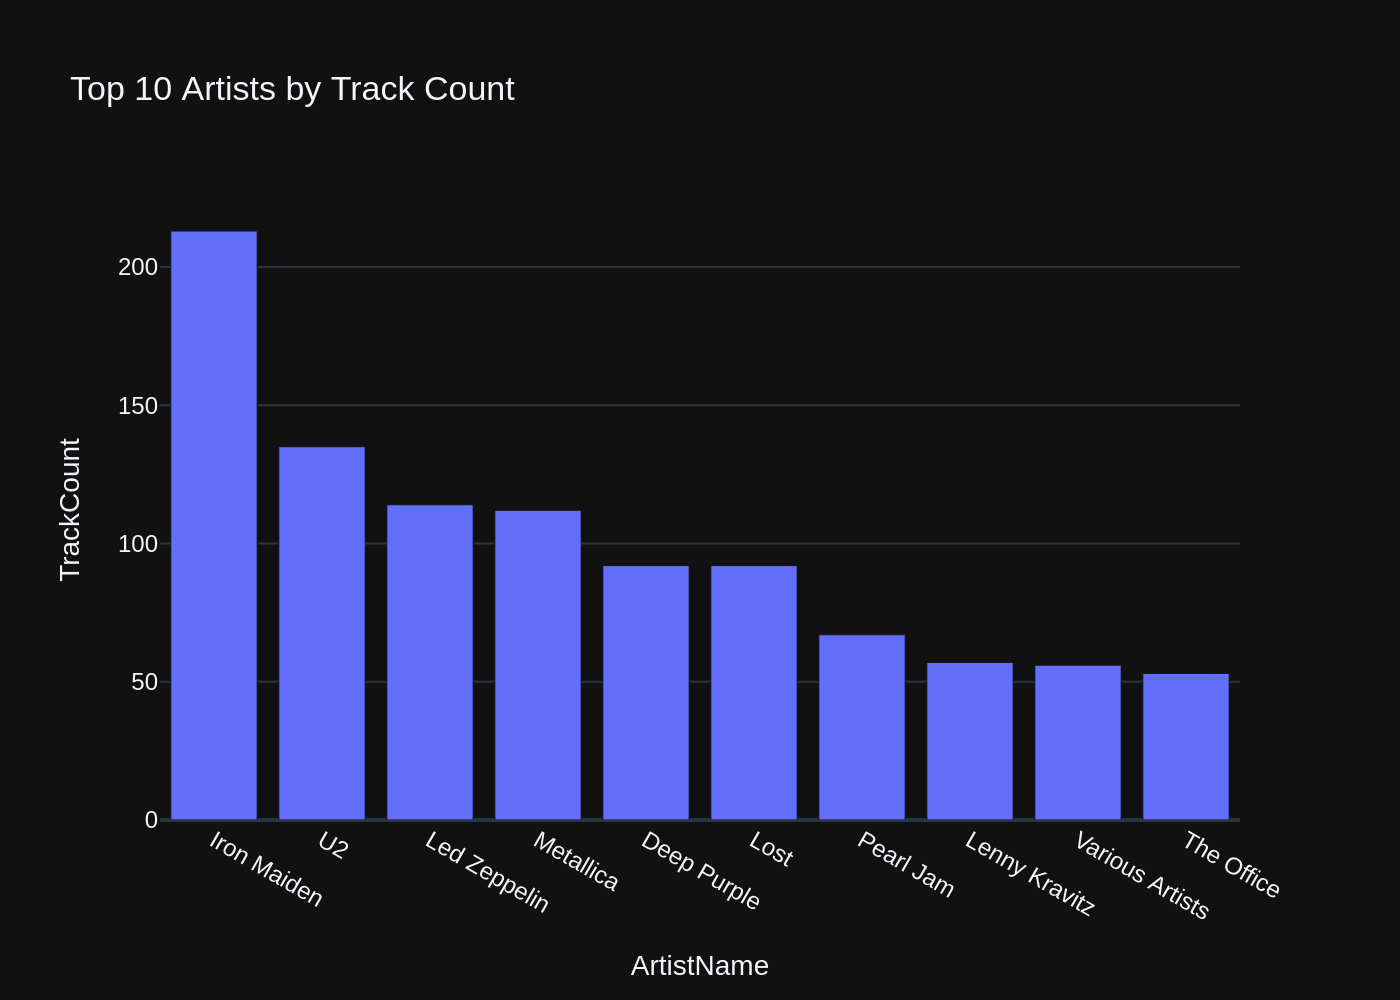





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName, Email FROM customers WHERE Country = 'Canada' LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,Email
0,François,Tremblay,ftremblay@gmail.com
1,Mark,Philips,mphilips12@shaw.ca
2,Jennifer,Peterson,jenniferp@rogers.ca
3,Robert,Brown,robbrown@shaw.ca
4,Edward,Francis,edfrancis@yachoo.ca
5,Martha,Silk,marthasilk@gmail.com
6,Aaron,Mitchell,aaronmitchell@yahoo.ca
7,Ellie,Sullivan,ellie.sullivan@shaw.ca



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df['Email'].values[0], title='Customer from Canada')
else:
    fig = px.scatter(df, x= df.columns[0], y=df.columns[2], hover_data=[df.columns[1]], symbol=df.columns[0], title='Customers from Canada')

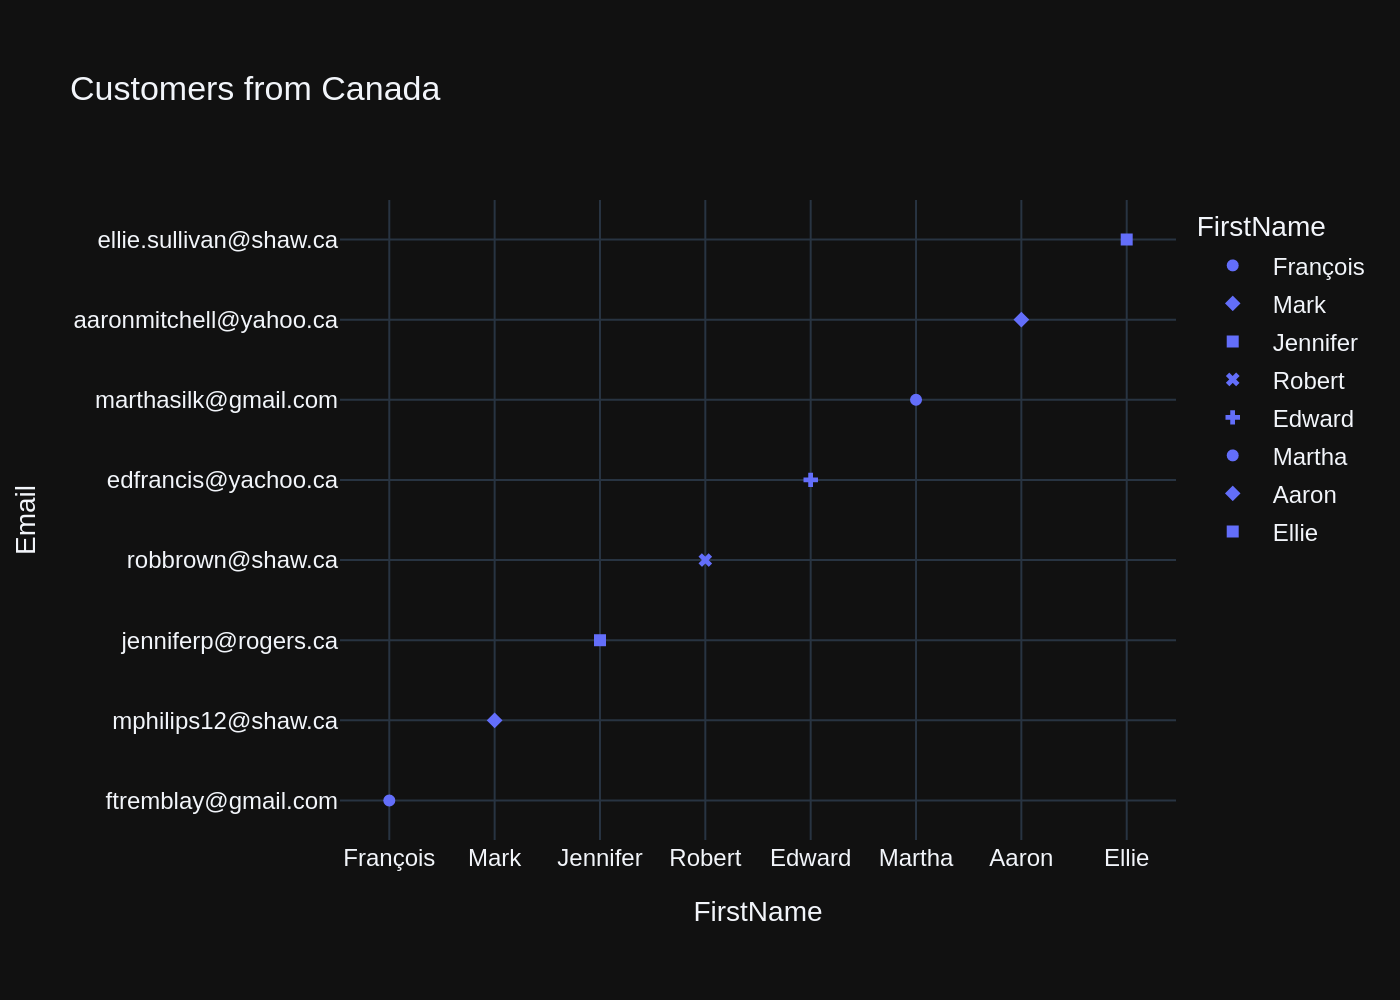





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY InvoiceCount DESC LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY InvoiceCount DESC LIMIT 1;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,InvoiceCount
0,1,Luís,Gonçalves,7



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['InvoiceCount'].values[0],
        title="Customer with the Most Invoices",
        color_scale=["greenyellow"]
    )
else:
    fig = px.bar(
        df,
        x='FirstName',
        y='InvoiceCount',
        title="Customers by Invoice Count",
        labels={'FirstName': 'First Name', 'InvoiceCount': 'Number of Invoices'}
    )

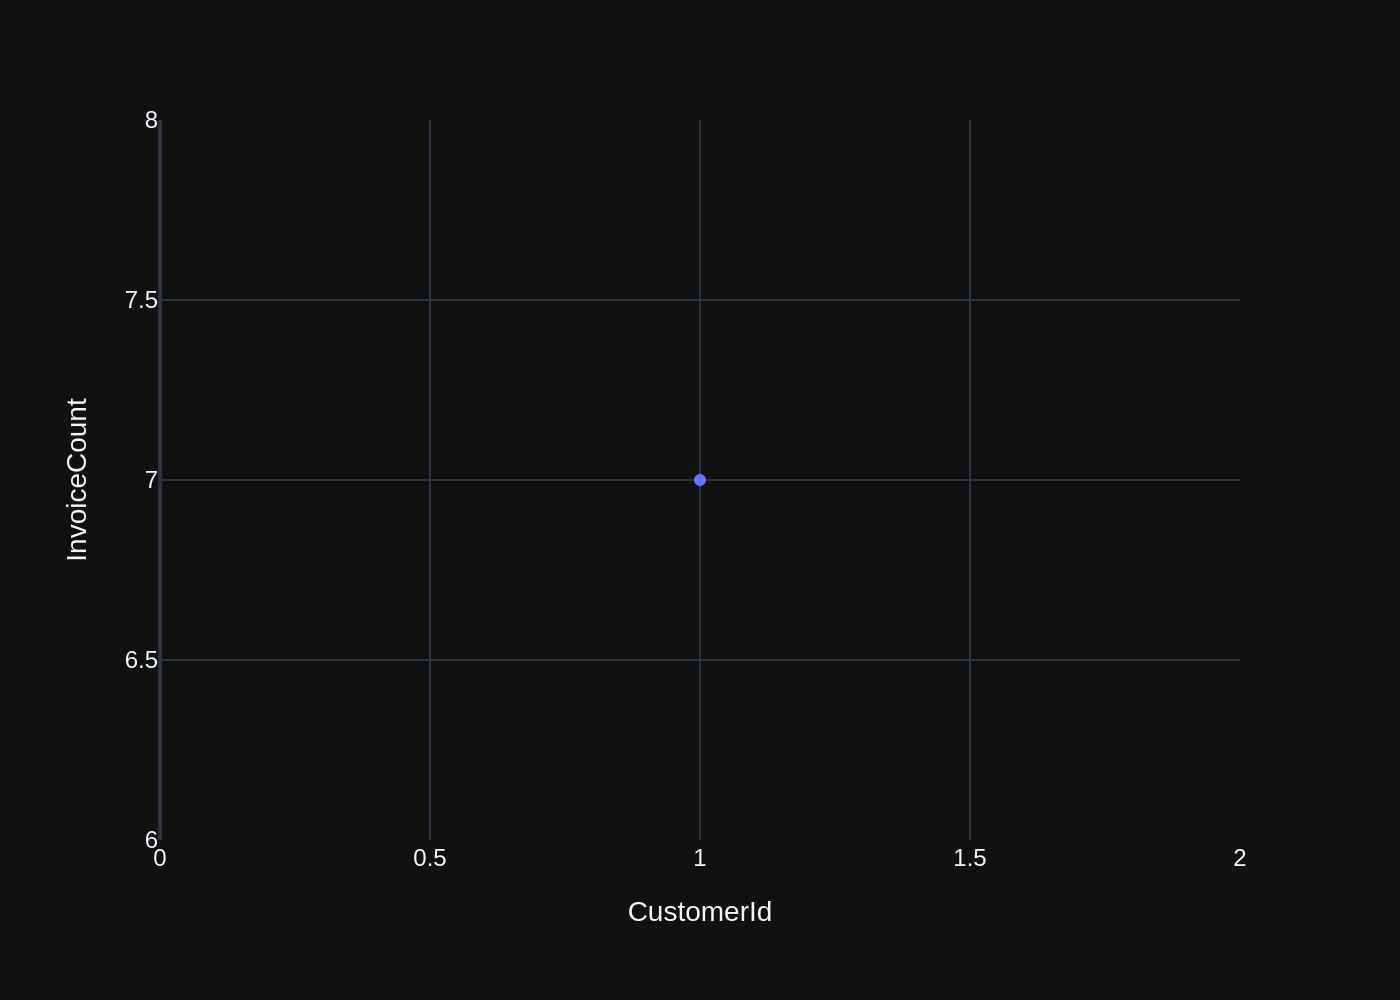





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY TotalQuantity DESC LIMIT 1;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY TotalQuantity DESC LIMIT 1;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,TotalQuantity
0,1,Luís,Gonçalves,38



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.indicator(
    if df.empty:
        title="No Data",
    else:
        value=df['TotalQuantity'].iloc[0],
        title=f"Customer with the Most Albums Sold: {df['FirstName'].iloc[0]} {df['LastName'].iloc[0]} (Total Quantity: {df['TotalQuantity'].iloc[0]})"
)

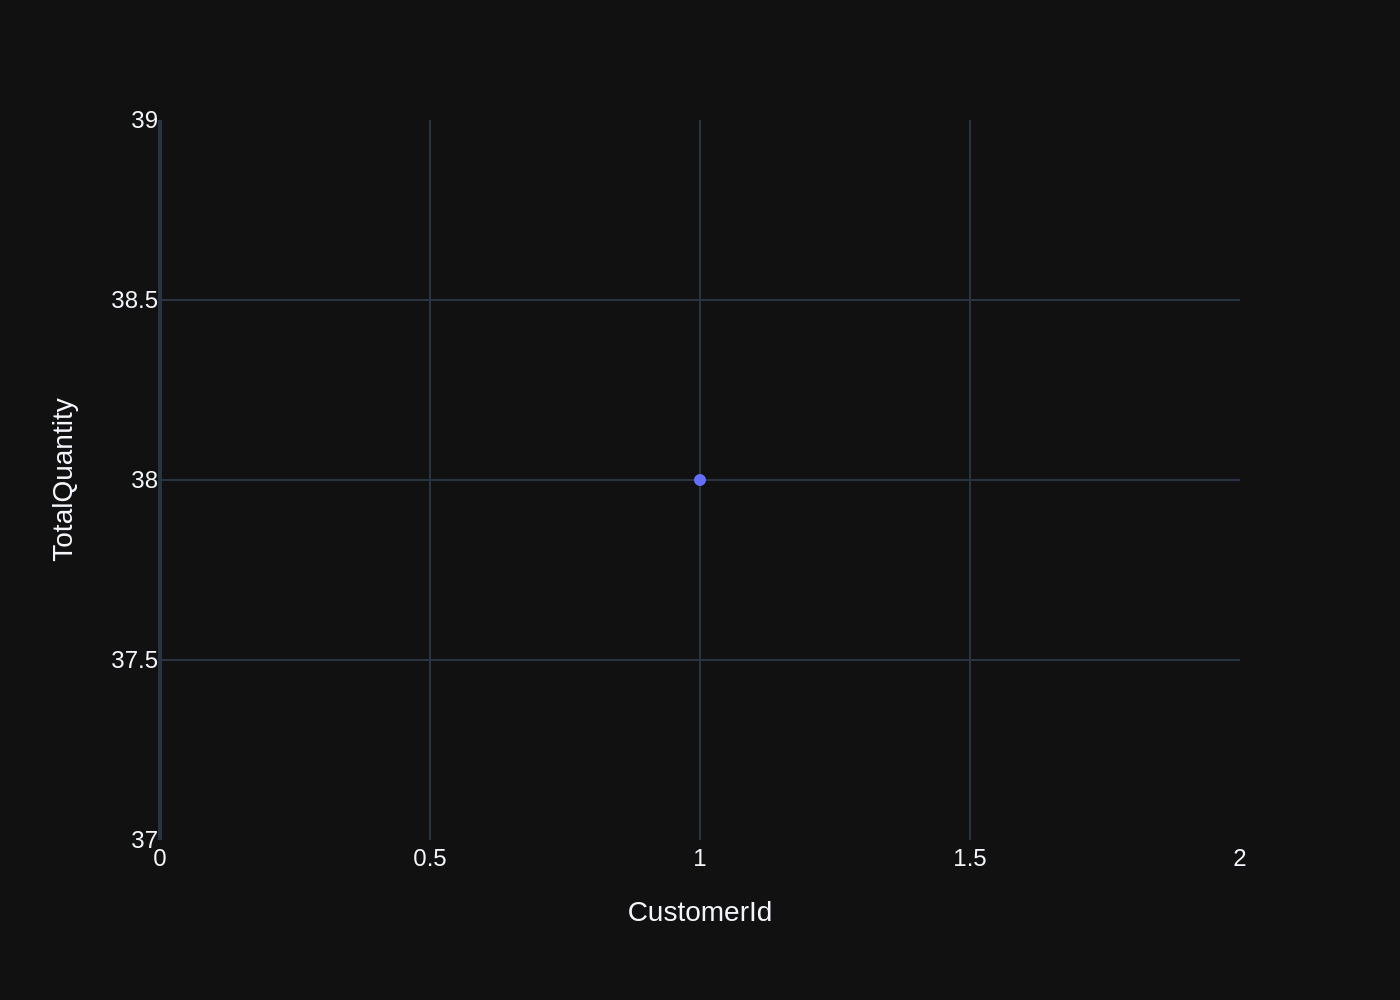





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY TotalQuantity DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY TotalQuantity DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,TotalQuantity
0,1,Luís,Gonçalves,38
1,2,Leonie,Köhler,38
2,3,François,Tremblay,38
3,4,Bjørn,Hansen,38
4,5,František,Wichterlová,38



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        value=df['TotalQuantity'].values[0],
        title=f"Top Customer Total Quantity: {df['FirstName'].values[0]} {df['LastName'].values[0]}"
    )
else:
    fig = px.bar(
        df, 
        x='FirstName', 
        y='TotalQuantity', 
        title="Top 5 Customers by Total Album Quantity",
        labels={'FirstName': 'Customer Name', 'TotalQuantity': 'Total Quantity'}
    )

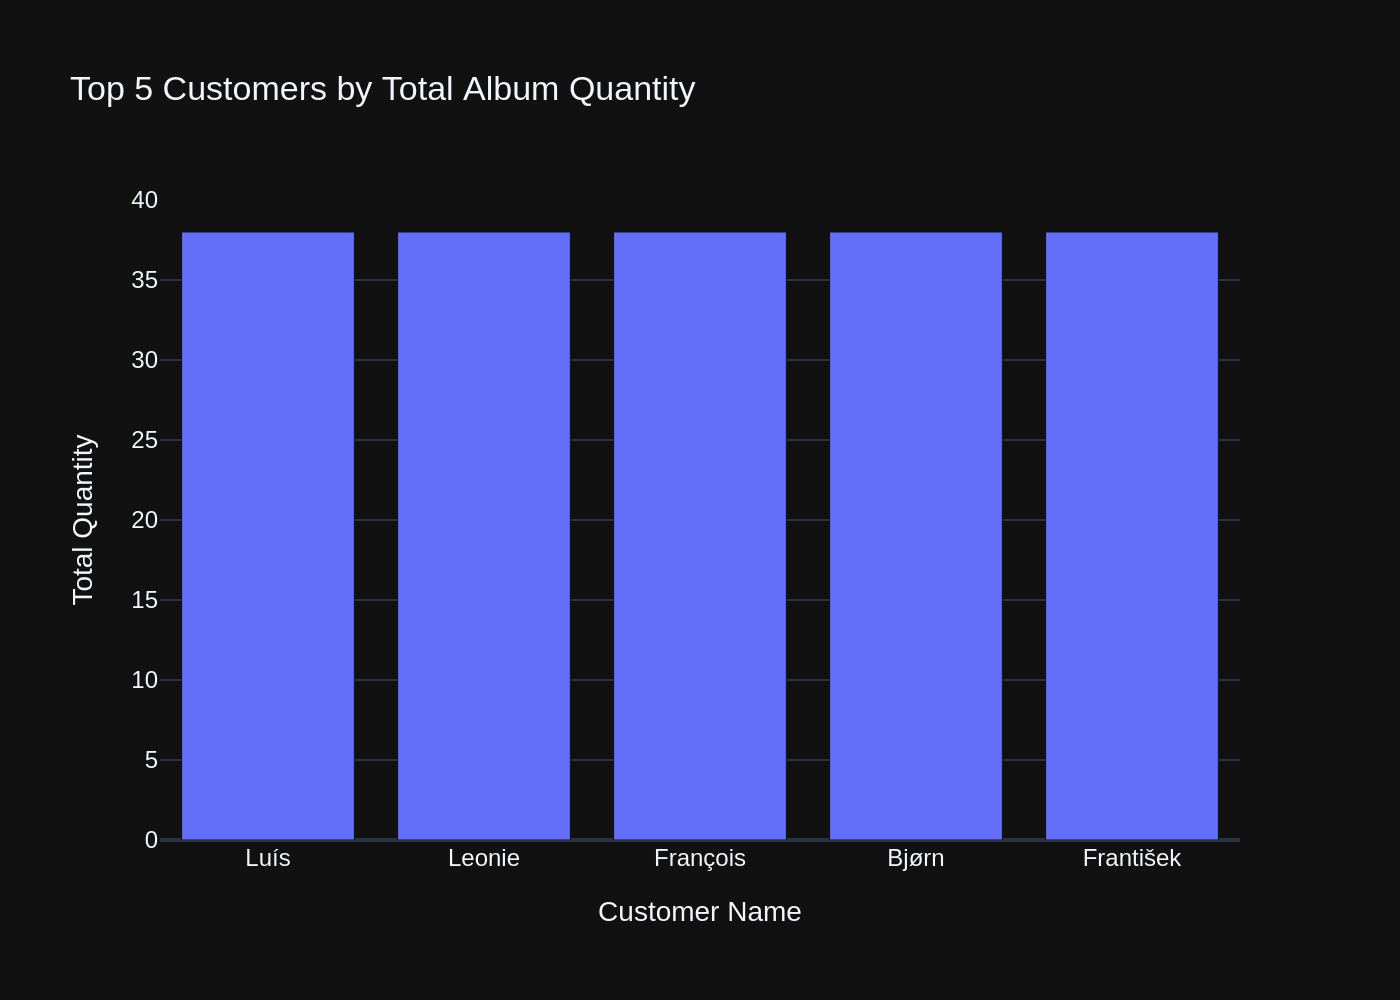





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY TotalSpent DESC LIMIT 5;


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.CustomerId, c.FirstName, c.LastName ORDER BY TotalSpent DESC LIMIT 5;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,TotalSpent
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.indicator(
    if df.shape[0] == 1,
    title="Top Customer by Spending",
    value=df['TotalSpent'].iloc[0],
    domain={'x': [0, 1], 'y': [0, 1]},
) if df.shape[0] == 1 else px.bar(
    df,
    x='FirstName',
    y='TotalSpent',
    title="Top 5 Customers by Spending",
    labels={'TotalSpent': 'Total Spent'}
)

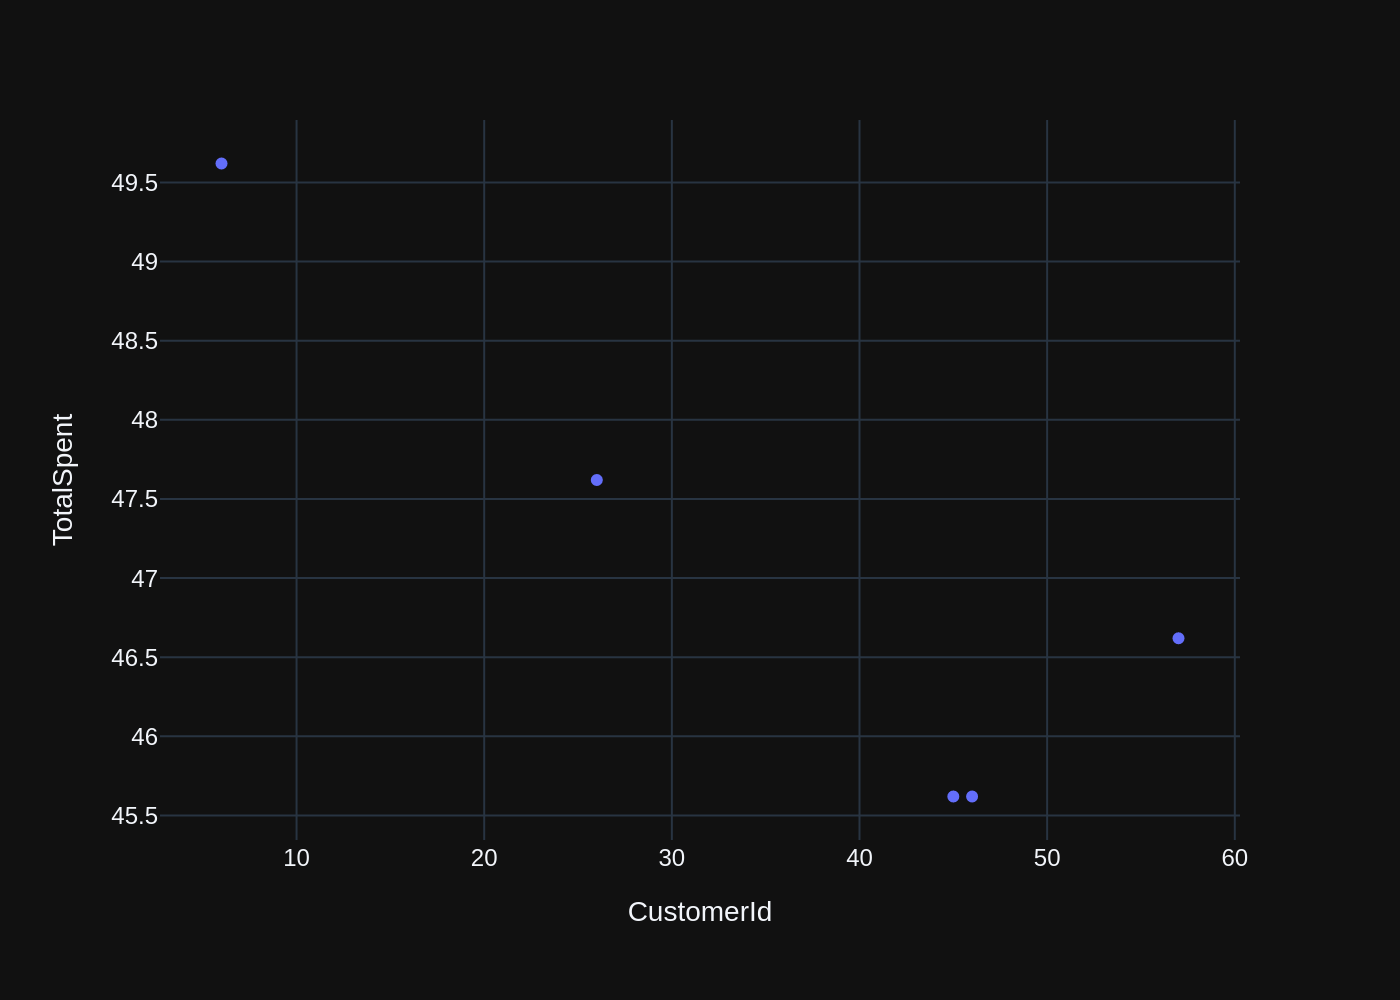





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



WITH PlaylistTrackCount AS (
    SELECT PlaylistId, COUNT(*) AS TrackCount, SUM(MediaTypeId) AS MediaTypeIdSum FROM playlist_track GROUP BY PlaylistId HAVING COUNT(*) >= 10
), TotalDuration AS (
    SELECT pt.PlaylistId, SUM(T1Milliseconds) AS TotalMilliseconds FROM (
        SELECT PT.PlaylistId, T.TrackId, T.Milliseconds FROM playlist_track PT JOIN tracks T ON PT.TrackId = T.TrackId WHERE PT.PlaylistId IN (SELECT PlaylistId FROM PlaylistTrackCount)
    ) AS T1 INNER JOIN playlist_track PT ON T1.TrackId = PT.TrackId GROUP BY PT.PlaylistId
) SELECT p.Name AS PlaylistName, pd.TotalMilliseconds / 1000 AS TotalDurationInSeconds FROM playlists p JOIN PlaylistTrackCount PTC ON p.PlaylistId = PTC.PlaylistId JOIN TotalDuration pd ON p.PlaylistId = pd.PlaylistId LIMIT 20


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT p.Name AS PlaylistName, SUM(T1Milliseconds) / 1000 AS TotalDurationInSeconds FROM playlists p JOIN playlist_track pt ON p.PlaylistId = pt_PlaylistId JOIN tracks t ON pt.TrackId = t.TrackId WHERE pt.PlaylistId IN (SELECT PlaylistId FROM (SELECT PlaylistId, COUNT(*) AS TrackCount FROM playlist_track GROUP BY PlaylistId HAVING COUNT(*) >= 10) AS PlaylistTrackCount) GROUP BY p.PlaylistId LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT p.Name AS PlaylistName, SUM(T1Milliseconds) / 1000 AS TotalDurationInSeconds FROM playlists p JOIN playlist_track pt ON p.PlaylistId = pt_PlaylistId JOIN tracks t ON pt.TrackId = t.TrackId WHERE pt.PlaylistId IN (SELECT PlaylistId FROM (SELECT PlaylistId, COUNT(*) AS TrackCount FROM playlist_track GROUP BY PlaylistId HAVING COUNT(*) >= 10) AS PlaylistTrackCount) GROUP BY p.PlaylistId LIMIT 20;


[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
WITH PlaylistTrackCount AS (
    SELECT PlaylistId, COUNT(*) AS TrackCount FROM playlist_track GROUP BY PlaylistId HAVING COUNT(*) >= 10
), TotalDuration AS (
    SELECT pt.PlaylistId, SUM(T.Milliseconds) AS TotalMilliseconds 
    FROM playlist_track PT 
    JOIN tracks T ON PT.TrackId = T.TrackId 
    WHERE PT.PlaylistId IN (SELECT PlaylistId FROM PlaylistTrackCount)
    GROUP BY pt.PlaylistId
)
SELECT p.Name AS PlaylistName, pd.TotalMilliseconds / 1000 AS TotalDurationInSeconds 
FROM playlists p 
JOIN PlaylistTrackCount PTC ON p.PlaylistId = PTC_PlaylistId JOIN TotalDuration pd ON p.PlaylistId = pd.PlaylistId;


[( <SQL> )]
generated SQL statement



WITH PlaylistTrackCount AS (
    SELECT PlaylistId, COUNT(*) AS TrackCount FROM playlist_track GROUP BY PlaylistId HAVING COUNT(*) >= 10
), TotalDuration AS (
    SELECT pt.PlaylistId, SUM(T.Milliseconds) AS TotalMilliseconds 
    FROM playlist_track PT 
    JOIN tracks T ON PT.TrackId = T.TrackId 
    WHERE PT.PlaylistId IN (SELECT PlaylistId FROM PlaylistTrackCount)
    GROUP BY pt.PlaylistId
)
SELECT p.Name AS PlaylistName, pd.TotalMilliseconds / 1000 AS TotalDurationInSeconds 
FROM playlists p 
JOIN PlaylistTrackCount PTC ON p.PlaylistId = PTC_PlaylistId JOIN TotalDuration pd ON p.PlaylistId = pd.PlaylistId;


[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
WITH PlaylistTrackCount AS (
    SELECT 
        PlaylistId, 
        COUNT(*) AS TrackCount,
        SUM(T.Milliseconds) AS TotalMillisecondsSum -- Use Milliseconds from tracks table
    FROM 
        playlist_track PT 
    JOIN 
        tracks T ON PT.TrackId = T.TrackId
    GROUP BY 
        PlaylistId
    HAVING 
        COUNT(*) >= 10
),
TotalDuration AS (
    SELECT 
        pt.PlaylistId,
        SUM(T1Milliseconds) AS TotalMilliseconds -- Using the calculated sum from PlaylistTrackCount
    FROM 
        (SELECT PT.PlaylistId, T.TrackId, T.Milliseconds FROM playlist_track PT JOIN tracks T ON PT.TrackId = T.TrackId WHERE PT.PlaylistId IN (SELECT PlaylistId FROM PlaylistTrackCount)) AS T1
    INNER JOIN 
        playlist_track PT ON T1.TrackId = PT.TrackId
    GROUP BY 
        PT.PlaylistId
)
SELECT 
    p.Name AS PlaylistName, 
    pd.TotalMilliseco

WITH PlaylistTrackCount AS (
    SELECT 
        PlaylistId, 
        COUNT(*) AS TrackCount,
        SUM(T.Milliseconds) AS TotalMillisecondsSum -- Use Milliseconds from tracks table
    FROM 
        playlist_track PT 
    JOIN 
        tracks T ON PT.TrackId = T.TrackId
    GROUP BY 
        PlaylistId
    HAVING 
        COUNT(*) >= 10
),
TotalDuration AS (
    SELECT 
        pt.PlaylistId,
        SUM(T1Milliseconds) AS TotalMilliseconds -- Using the calculated sum from PlaylistTrackCount
    FROM 
        (SELECT PT.PlaylistId, T.TrackId, T.Milliseconds FROM playlist_track PT JOIN tracks T ON PT.TrackId = T.TrackId WHERE PT.PlaylistId IN (SELECT PlaylistId FROM PlaylistTrackCount)) AS T1
    INNER JOIN 
        playlist_track PT ON T1.TrackId = PT.TrackId
    GROUP BY 
        PT.PlaylistId
)
SELECT 
    p.Name AS PlaylistName, 
    pd.TotalMilliseconds / 1000 AS TotalDurationInSeconds 
FROM 
    playlists p 
JOIN 
    PlaylistTrackCount PTC ON p.PlaylistId = PTC.PlaylistId 
JOIN 
    TotalDuration pd ON p.PlaylistId = pd.PlaylistId 
LIMIT 20;





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT a.Name AS ArtistName FROM artists a JOIN albums al ON a.ArtistId = al.ArtistId JOIN tracks t ON al.AlbumId = t.AlbumId JOIN ( SELECT TrackId FROM tracks GROUP BY TrackId HAVING COUNT(GenreId) > 1 ) mg ON t.TrackId = mg.TrackId GROUP BY a.ArtistId, a.Name LIMIT 20;


[( <SQL> )]
generated SQL statement



SELECT a.Name AS ArtistName FROM artists a JOIN albums al ON a.ArtistId = al.ArtistId JOIN tracks t ON al.AlbumId = t.AlbumId JOIN ( SELECT TrackId FROM tracks GROUP BY TrackId HAVING COUNT(GenreId) > 1 ) mg ON t.TrackId = mg.TrackId GROUP BY a.ArtistId, a.Name LIMIT 20;


[( <DataFrame> )]
queried dataframe



,ArtistName



[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Name AS ArtistName FROM artists a JOIN albums al ON a.ArtistId = al.ArtistId JOIN tracks t ON al.AlbumId = t.AlbumId JOIN genres g1 ON t.GenreId = g1.GenreId WHERE t.TrackId IN (SELECT TrackId FROM tracks JOIN genres ON tracks.GenreId = genres.GenreId GROUP BY TrackId HAVING COUNT(DISTINCT GenreId) > 1) GROUP BY a.ArtistId, a.Name LIMIT 20


[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
with tracks appearing in multiple genres:

```sql
SELECT DISTINCT a.ArtistId, ar.Name AS ArtistName
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
WHERE t.GenreId IN (
    SELECT GenreId FROM tracks 
    GROUP BY GenreId 
    HAVING COUNT(DISTINCT TrackId) > 1
);


[( <SQL> )]
generated SQL statement



with tracks appearing in multiple genres:

```sql
SELECT DISTINCT a.ArtistId, ar.Name AS ArtistName
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
WHERE t.GenreId IN (
    SELECT GenreId FROM tracks 
    GROUP BY GenreId 
    HAVING COUNT(DISTINCT TrackId) > 1
);


[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
with tracks appearing in multiple genres:

```sql
WITH artist_albums AS (
    SELECT a.ArtistId, g.GenreId 
    FROM albums a 
    JOIN tracks t ON a.AlbumId = t.AlbumId 
    JOIN genres g ON t.GenreId = g.GenreId
),
genre_counts AS (
    SELECT ArtistId, COUNT(DISTINCT GenreId) AS GenreCount 
    FROM artist_albums 
    GROUP BY ArtistId 
    HAVING GenreCount > 1
)
SELECT DISTINCT a.Name AS ArtistName 
FROM artists a 
JOIN genre_counts gc ON a.ArtistId = gc.ArtistId;


[( <SQL> )]
generated SQL statement



with tracks appearing in multiple genres:

```sql
WITH artist_albums AS (
    SELECT a.ArtistId, g.GenreId 
    FROM albums a 
    JOIN tracks t ON a.AlbumId = t.AlbumId 
    JOIN genres g ON t.GenreId = g.GenreId
),
genre_counts AS (
    SELECT ArtistId, COUNT(DISTINCT GenreId) AS GenreCount 
    FROM artist_albums 
    GROUP BY ArtistId 
    HAVING GenreCount > 1
)
SELECT DISTINCT a.Name AS ArtistName 
FROM artists a 
JOIN genre_counts gc ON a.ArtistId = gc.ArtistId;

In [16]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [17]:
elapsed_time

186.1370394229889

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'qwen2.5' 
 took 186 sec
 run on 'ducklover1' 
 at 20241121-230037


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-qwen2.5-186s-ducklover1-20241121-230037.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,010e22ef-86cb-56e3-9692-81109e6510ba-sql,\n Find the top 5 customers who b...,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql
1,03129d1e-2a23-52be-aee0-9c42774248ad-sql,"Find all tracks with a name containing ""What"" ...",SELECT Name FROM tracks WHERE LOWER(Name) LIKE...,sql
2,09b5c84c-abca-5731-af61-7d148c5bd42f-sql,Can you list all tables in the SQLite database...,SELECT name FROM sqlite_master WHERE type='tab...,sql
3,1943d53e-1d2e-531e-b3fc-097ae8c1e917-sql,Find all invoices since 2010 and the total amo...,"SELECT InvoiceId, InvoiceDate, Total FROM invo...",sql
4,33d361a3-7ca0-50c3-8589-9f7e352ae32b-sql,List all customers from Canada and their email...,"SELECT FirstName, LastName, Email FROM custome...",sql
5,3573cc12-226d-594d-b18e-59b7a60974e9-sql,Find the top 5 most expensive tracks (based on...,"SELECT Name, UnitPrice FROM tracks ORDER BY Un...",sql
6,59006847-350a-57fd-b650-3b0a11540dde-sql,List all employees and their reporting manager...,"SELECT e1.FirstName, e1.LastName, COALESCE(e2....",sql
7,59c18bcf-ec50-510a-bb26-f750db5f61a5-sql,Get the total number of invoices for each cust...,"SELECT c.CustomerId, c.FirstName, c.LastName, ...",sql
8,5db72f5c-9945-58d3-8bf7-4faad0e36e72-sql,\n Can you find the top 10 most popula...,"SELECT a.Name AS ArtistName, COUNT(t.TrackId) ...",sql
9,5e526ae4-4473-5cc5-9185-b16c465687c0-sql,How many customers are there,SELECT COUNT(*) FROM customers LIMIT 20,sql


In [21]:
df_training_data.to_csv(file_csv, index=False)